# MODEL COMPLEXITY, BIAS, AND VARIANCE

Look at model fitting from the perspective of minimizing the "expected loss" associated with a model choice and breaking this down into underlying components.  Those components illustrate the tradeoff between the following:  
1. BIAS: expected loss arising from model not being flexible enough to capture underlying signal.  High bias means model isn't accurate because it doesn't have capacity to capture signal.  The average deviation between our predictions and the actual value.
2. VARIANCE: expected loss arising from the model being too overcomplex and fitting to a specific instance of the model.  High variance means the model won't be accurate because it was overfit to training data and thus won't generalize well.  The difference betwen our various model predictions of the same data point - the tendency to of our models to overfit the noise in our sample - therefore can't generalize.

**The Underlying Process**
* Assume there is a true, unknown, underlying process that the data follows.  
* Goal is to uncover that process to predict future outcomes.
* There is also inherent noise in the process that creates uncertainty around the true process.  

**Assumptions**  
* Underlying model is of the form $y = f(x) + \epsilon$
* Errors are independent.
* Errors have mean of 0.
* Errors have constant variance.
* Errors have a normal distribution.

# INVESTIGATE KNOWN FUNCTION AND ERROR
* Scientific method approach to learning (reproducible example : reprex).
* Underlying process: $y = sin(x) + \epsilon ; \epsilon$ ~ N(0,0.25) ; 0$\leq$x$\leq$10
* Look at 3 models to reproduce underlying signal:  
1. y = $\bar{X}$
2. $y = x$
3. $y = x + x^2 + x^3 + x^4$
4. $y = x + x^2 + x^3 + x^4 + x^5 + x^6 + x^7$  

* Model 4 has the smallest bias.
* Model 1 has the smallest variance.
* Model 3 has the best bias-variance tradeoff.

In [1]:
library(glmnet)
library(ggplot2)
library(gridExtra)

set.seed(150) #you might want to remove this comment later on to see if similar results obtain from other randomly generated data sets.
x <- runif(25,0,10) #generate 25 predictor variables uniformaly over the interval 0 to 10
df <- data.frame(x = x, y = sin(x) + rnorm(25,0,0.5), fO = sin(x), X1 = x, X2 = x^2, X3 = x^3, X4 = x^4, X5 = x^5, X6 = x^6, X7 = x^7) #generate 25 target variables and features needed to fit polynomial regression models

m1 <- lm(as.formula("y~X1"), data = df)
m4 <- lm(as.formula("y~X1+X2+X3+X4"), data = df)
m7 <- lm(as.formula("y~X1+X2+X3+X4+X5+X6+X7"), data = df)

df$m0 <- mean(df$y)
df$m1 <- predict(m1,newdata = df) 
df$m4 <- predict(m4,newdata = df) 
df$m7 <- predict(m7,newdata = df) 

p1 <- ggplot(data = df, aes(x = x)) + geom_point(aes(y = y), size = 3) + geom_smooth(aes(y = fO), se=FALSE, color = "blue", size = 1) + geom_smooth(aes(y = m0), se=FALSE, color = "red") + ggtitle("degree 0") + scale_y_continuous("y") + 
  annotate("text", x = 2.5, y = 1.1, label = "True process", color = "blue") +
  annotate("text", x = 2, y = -0.15, label = "Fitted model", color = "red")
p2 <- ggplot(data = df, aes(x = x)) + geom_point(aes(y = y), size = 3) + geom_smooth(aes(y = fO), se=FALSE, color = "blue", size = 1) + geom_smooth(aes(y = m1), se=FALSE, color = "red") + ggtitle("degree 1") + scale_y_continuous("y") +
  annotate("text", x = 2.5, y = 1.1, label = "True process", color = "blue") +
  annotate("text", x = 2, y = -0.3, label = "Fitted model", color = "red")
p3 <- ggplot(data = df, aes(x = x)) + geom_point(aes(y = y), size = 3) + geom_smooth(aes(y = fO), se=FALSE, color = "blue", size = 1) + geom_smooth(aes(y = m4), se=FALSE, color = "red") + ggtitle("degree 4") + scale_y_continuous("y",limits = c(-2,2)) +
  annotate("text", x = 2.5, y = 1.1, label = "True process", color = "blue") +
  annotate("text", x = 2, y = -0.9, label = "Fitted model", color = "red")
p4 <- ggplot(data = df, aes(x = x)) + geom_point(aes(y = y), size = 3) + geom_smooth(aes(y = fO), se=FALSE, color = "blue", size = 1) + geom_smooth(aes(y = m7), se=FALSE, color = "red") + ggtitle("degree 7") + scale_y_continuous("y",limits = c(-2,2)) +
  annotate("text", x = 2.5, y = 1.1, label = "True process", color = "blue") +
  annotate("text", x = 2, y = -0.8, label = "Fitted model", color = "red")




Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


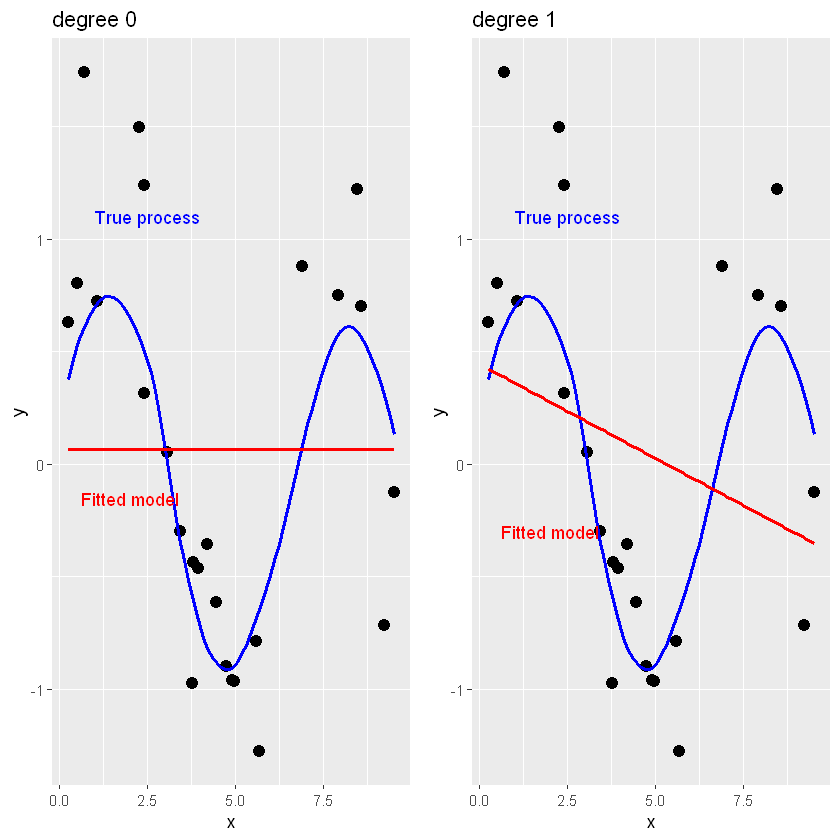

In [4]:
grid.arrange(p1,p2,ncol=2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


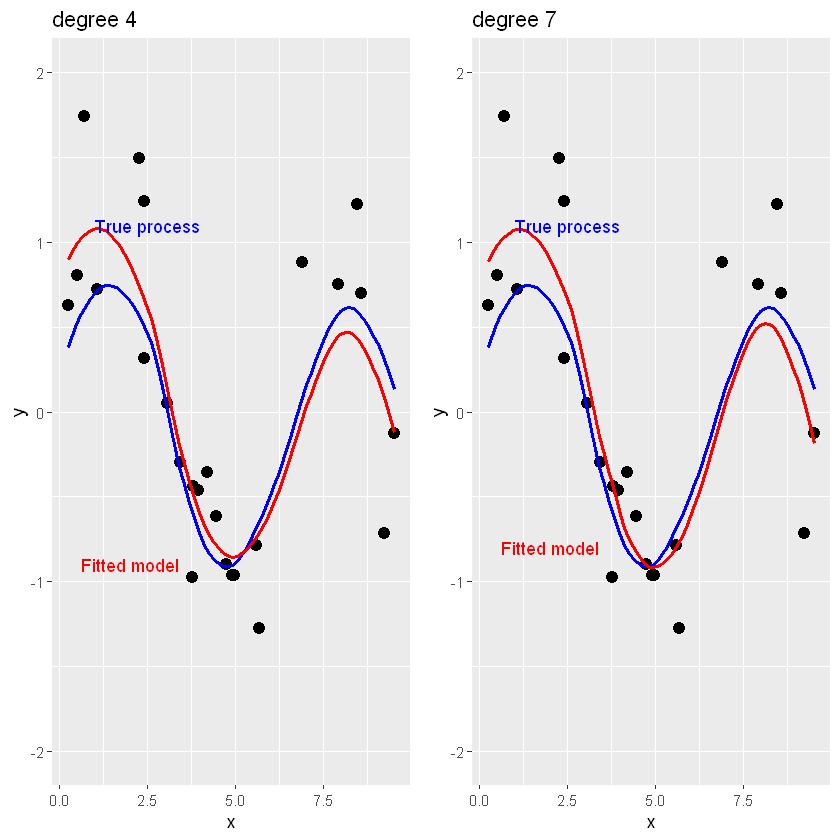

In [10]:
grid.arrange(p3,p4,ncol=2)

**Reproducible Example: Variance/Bias Illustration**

In [ ]:
#CHUNK 4
library(glmnet)
library(gridExtra)

# Set up the features for a ninth degree polynomial
df$X1 <- df$x
df$X2 <- df$x^2
df$X3 <- df$x^3
df$X4 <- df$x^4
df$X5 <- df$x^5
df$X6 <- df$x^6
df$X7 <- df$x^7
df$X8 <- df$x^8
df$X9 <- df$x^9

# set up the formula
f <- as.formula("y~X1+X2+X3+X4+X5+X6+X7+X8+X9")

set.seed(293)

# For loop to fit the ten models, each using a new random set of 25 x values
for (i in c(1:10)) {
  rows <- sample.int(nrow(df), size = 25)
  
  m1 <- lm(f, data = df[rows,]) #fit a model using only those 25 values
  
  df[, paste("predict",i,sep = "")] <- predict(m1, newdata = df) #add the predicted values to the dataframe (note that it is determined for all 1001 values, not 25)
}

# plot each of the fitted curves
p1 <- ggplot(data = df, aes(x = x)) + 
        geom_line(aes(y = df$predict1)) +
        geom_line(aes(y = df$predict2)) +
        geom_line(aes(y = df$predict3)) +
        geom_line(aes(y = df$predict4)) +
        geom_line(aes(y = df$predict5)) +
        geom_line(aes(y = df$predict6)) +
        geom_line(aes(y = df$predict7)) +
        geom_line(aes(y = df$predict8)) +
        geom_line(aes(y = df$predict9)) +
        geom_line(aes(y = df$predict10)) +
        scale_y_continuous("y",limits = c(-2.5,2.5)) +
        ggtitle("Variance")

#determine the average fitted cureve and plot it along with the sine curve
df$average <- rowMeans(df[,c(13:22)])
p2 <- ggplot(data = df, aes(x = x)) + 
        geom_line(aes(y = fO), color = "blue") +
        geom_line(aes(y = average), color = "red") +
        scale_y_continuous("y",limits = c(-2,2)) +
        annotate("text", x = 2, y = 1.2, label = "True process", color = "blue") +
        annotate("text", x = 2, y = 0, label = "Avg Model", color = "red") +
        ggtitle("Bias")

  
grid.arrange(p1,p2,ncol = 2)

**Use Lasso Regression to feature select on above example**

Warning message:
"Removed 21 rows containing missing values (geom_path)."

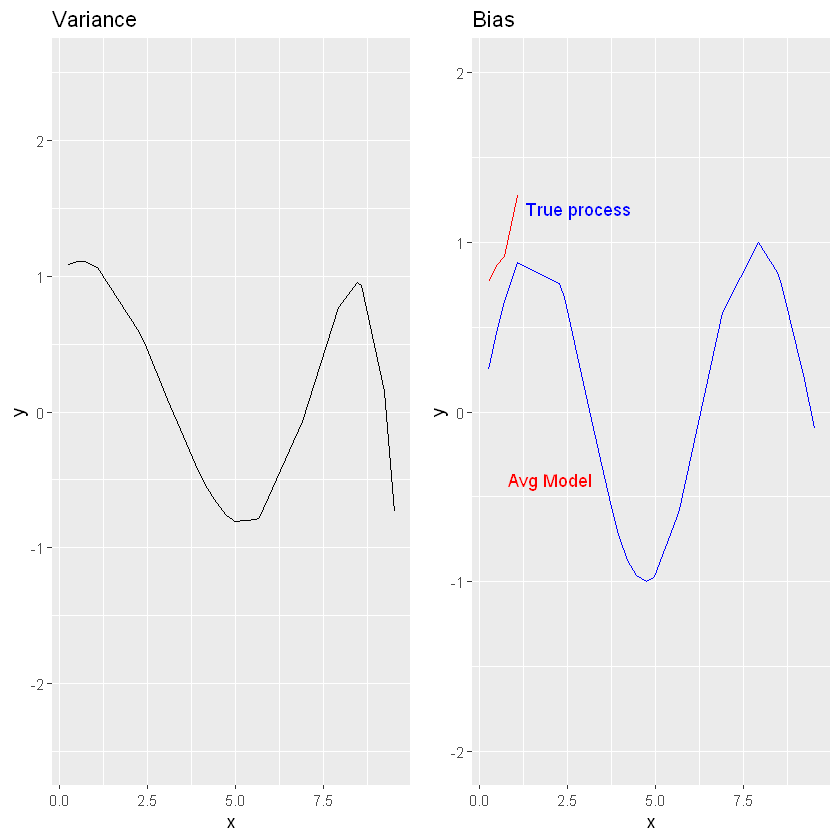

In [12]:
f <- as.formula("y~X1+X2+X3+X4+X5+X6+X7+X8+X9")

set.seed(293)

# For loop to fit the models
for (i in c(1:10)) {
  # Set up matrix
  rows <- sample.int(nrow(df), size = 25)
  X <- model.matrix(f, data = df[rows,])
  
  m <- glmnet(X, y = df$y[rows], family = "gaussian", alpha = 1, lambda = 0.001)
  
  df[, paste("predict",i,sep = "")] <- predict(m, newx = model.matrix(f, data = df))
}

#  plot the models
p1 <- ggplot(data = df, aes(x = x)) + 
        geom_line(aes(y = df$predict1)) +
        geom_line(aes(y = df$predict2)) +
        geom_line(aes(y = df$predict3)) +
        geom_line(aes(y = df$predict4)) +
        geom_line(aes(y = df$predict5)) +
        geom_line(aes(y = df$predict6)) +
        geom_line(aes(y = df$predict7)) +
        geom_line(aes(y = df$predict8)) +
        geom_line(aes(y = df$predict9)) +
        geom_line(aes(y = df$predict10)) +
        scale_y_continuous("y",limits = c(-2.5,2.5)) +
        ggtitle("Variance")

df$average <- rowMeans(df[,c(13:22)])
p2 <- ggplot(data = df, aes(x = x)) + 
        geom_line(aes(y = fO), color = "blue") +
        geom_line(aes(y = average), color = "red") +
        scale_y_continuous("y",limits = c(-2,2)) +
        annotate("text", x = 2.8, y = 1.2, label = "True process", color = "blue") +
        annotate("text", x = 2, y = -0.4, label = "Avg Model", color = "red") +
        ggtitle("Bias")

  
grid.arrange(p1,p2,ncol = 2)

# THE LOSS FUNCTION

* The goal is to find a measure that reflects all sources of error.
* A Loss Function is a function of 2 variables - the prediction and new observation that measures error.
* An example is the squared loss function.
* Loss function is a Random Variable - might be more effecive to look at expected loss.

**Perfect Model**
* Consider a model that perfectly captured the underlying signal.  What is expected Squared Loss?
* Answer:  $\sigma^2$
* Often called the process variance.

**3 Components of Expected Loss**
1. Variance that arises from limited training data - but assumes the underlying model is correct.
    * The more training data we have - the smaller this component is.
2. Bias that arises from having the wrong model.
3. Unavoidable process variance.

**Exercise**
Split diamond dataset into training and validating set. Create numerous features (squared etc).  Fit 10 regularized regression models and compare results.  Repeat for different values of lambda and compare results.

# MODEL ASSESSMENT AND SELECTION

**Fit Statistics - Regression**
* Root Mean Squared Error
* Mean Absolute Error

**Fit Statistics - Classification**
* False Positive = Incorrectly Reject Null Hypothesis

![](ConfusionMatrix.png)

* Accuracy:  Accuracy and Error Rate
* Relevance: Precision and Sensitivity

**ROC Curve**
* Receiver Operator Characteristic Curve
* Compares False Positive Rate with True Positive Rate over a range of cutoff values.
* Generally - FPR on horizontal axis ; TPR on vertical axis

**POINTS ON THE CURVE**
* Set all observations to be positive:  (1,1) - always a point
* Set all observations to be negative: (0,0) - always a point
* Selected cutoff value.

**ROC CALCULATION**

In [ ]:
library(pROC)
library(stats)

data.all <- read.csv("BreastCancerWisconsinDataSet.csv")

# Basic cleaning
# set the target: we are trying to predict whether a diagnosis is malignant (M) or benign (B).
data.all$target [data.all$diagnosis == "M"] = 1
data.all$target [data.all$diagnosis == "B"] = 0

# All variables available for training
vars <- names(data.all)[c(-1, -2, -33)]
data.all <- data.all[c(-1, -2, -33)]

# Build a logistic regression model with 3 features
glm.3feat <- glm(
  target ~ radius_mean + area_mean + concavity_mean
  ,data = data.all
  ,family = binomial(link = "logit")
  )

# Build a logistic regression model with 1 feature
glm.1feat <- glm(
  target ~ radius_mean
  ,data = data.all
  ,family = binomial(link = "logit")
)

# Add the predictions to the dataset
pred.3feat <- predict(glm.3feat, data.all)
data.all$pred.3feat <- pred.3feat

pred.1feat <- predict(glm.1feat, data.all)
data.all$pred.1feat <- pred.1feat

# Create the confusion matrices using a cut-off of 0.5
table(data.all$target, data.all$pred.3feat > 0.5)
table(data.all$target, data.all$pred.1feat > 0.5)

# Plot ROC curve and calculate AUC
plot(roc(data.all$target, data.all$pred.3feat))
plot(roc(data.all$target, data.all$pred.1feat), add=TRUE, col='red')
`

**AREA UNDER (ROC) CURVE : AUC**
* Goal of ROC is for FPR to be below TPR.
* Good result is a curve well above the line from (0,0) to (1,1).
* AUC is the area below the ROC curve - above the (0,0) to (1,1) line.

# AIC AND BIC
* Aikake Information Criterion and Bayesian Information Criterion.
* Both estimate information loss using log-likelihood and penalize model complexity.
* Penalty on BIC is usually higher.
* $AIC = 2k - 2ln\hat{L}$
* $BIC = k\ln n - 2ln\hat{L}$
    * k = number of parameters ; n = number of observations
* Use a series of models built on the same dataset and select model with lowest AIC or BIC.
* Model complexity here is simply number of parameters - but can actually be more involved than that (levels of factors).

# VALIDATION FRAMEWORK
* How well does our model perform on unseen data?
* Should reduce variance (from bias/variance tradeoff) over a model that is simply built on entire dataset.
* Reminder:  2 most common methods used are Test/Train/Validate splits and K-Fold Validation.

**Example of Validation Framework**

In [13]:
library(caret)
library(stats)

# Generate some noise univariate data
set.seed(101)
x <- sort(floor(rnorm(100, 25, 5))) #generates and sorts random integers
y <- x*rnorm(length(x), 1.6, 0.5)+10 #target variable has multiplicative noise + 10
df <- data.frame(x,y)

# Creating a train index to select 60% of the rows as training data
train_index <- createDataPartition(df$y, times = 1, p = 0.6, list = FALSE)

# Split the data set into train and test
df.train <- df[train_index,]
df.test <- df[-train_index,]

# Fit two models to the simulated data
# An overfitting fifth degree polynomial model
polym <- lm(y ~ poly(x, 5), df.train)
summary(polym)

# A linear model
lm1 <- lm(y ~ x, df.train)
summary(lm1)

# Calculate AIC & BIC
# We can extract the log-likelihood from our model with the stats::logLik function
logLik(lm1)

# Compute AIC with logLik or use the stats::AIC function
AIC(lm1)
2*3 - 2*logLik(lm1) == AIC(lm1)

# Compute BIC with logLik or use the stats::BIC function
BIC(lm1)
log(length(df.train$x))*3 - 2*logLik(lm1) == BIC(lm1)

#Now get AIC and BIC for the polynomial model
AIC(polym)
BIC(polym)


Loading required package: lattice



Call:
lm(formula = y ~ poly(x, 5), data = df.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.035  -6.785  -1.056   7.471  27.713 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.709      1.627  29.934  < 2e-16 ***
poly(x, 5)1   74.030     12.604   5.873 2.72e-07 ***
poly(x, 5)2   13.147     12.604   1.043    0.302    
poly(x, 5)3  -16.903     12.604  -1.341    0.186    
poly(x, 5)4    2.456     12.604   0.195    0.846    
poly(x, 5)5   -3.990     12.604  -0.317    0.753    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.6 on 54 degrees of freedom
Multiple R-squared:   0.41,	Adjusted R-squared:  0.3553 
F-statistic: 7.504 on 5 and 54 DF,  p-value: 2.082e-05



Call:
lm(formula = y ~ x, data = df.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.453  -6.090  -1.426   6.333  29.135 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1487     8.3554   0.018    0.986    
x             1.9821     0.3346   5.923 1.82e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.5 on 58 degrees of freedom
Multiple R-squared:  0.3769,	Adjusted R-squared:  0.3662 
F-statistic: 35.09 on 1 and 58 DF,  p-value: 1.822e-07


'log Lik.' -235.6525 (df=3)

[1] 477.3051

[1] TRUE

[1] 483.5881

[1] TRUE

[1] 482.0353

[1] 496.6957

**CALC RMSE**

In [14]:
df.train$y_poly_pred <- predict(polym, df.train)
df.train$y_lm_pred <- predict(lm1, df.train)

# Use each model to predict the test data set
df.test$y_poly_pred <- predict(polym, df.test)
df.test$y_lm_pred <- predict(lm1, df.test)

RMSE <- function(actual, predicted){
  return(sqrt(mean((actual - predicted)^2)))
}

# Calculate Root Mean Squared Error for the train data set
RMSE(df.train$y, df.train$y_poly_pred)
RMSE(df.train$y, df.train$y_lm_pred)

# Calculate Root Mean Squared Error for the test (hold-out) data set
RMSE(df.test$y, df.test$y_poly_pred)
RMSE(df.test$y, df.test$y_lm_pred)

[1] 11.95746

[1] 12.28776

[1] 12.25263

[1] 11.80529

# CROSS VALIDATION
* Typically modelers plot the mean and standard error of population tests for each model instance and select the best model.
* Ultimately train on full dataset for generating our future predictions.
* Often use lowest average prediction error is selected.

In [9]:
colnames(diamonds)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [13]:
data.all <- diamonds

data.all$target<- ifelse(data.all$cut == "Ideal", 1,0)

# Some simple cleasing and set up
 
 # all variables available for training
data.all <- data.all[c(-2)]

 # split data into training vs validation sets
set.seed(1000)
data.all$rand <- runif(nrow(data.all))
data.training <- data.all[which(data.all$rand < 0.7), ] 
data.validation <- data.all[which(data.all$rand >= 0.7), ]
data.all$rand <- NULL
data.training$rand <- NULL


**Perform Cross Validation**
* cv.glmnet: nfolds argument not specified:  uses default of 10

In [14]:
#CHUNK 2
library(glmnet)
# Fit a logistic regression model using ridge regression
f <- as.formula(paste("target~", paste(colnames(data.all)[-10], collapse = "+")))
X <- model.matrix(f,data.training)

m <- cv.glmnet(x = X, 
            y = data.training$target,
            family = "binomial",
            alpha = 1,
            type.measure = "class")


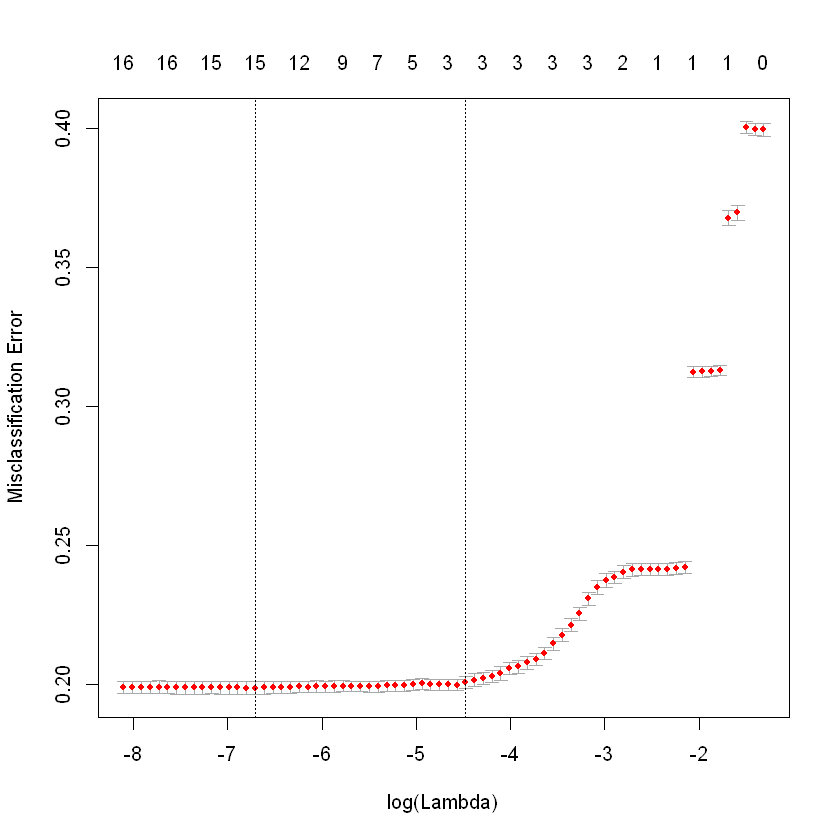

In [15]:
plot(m)

* Left-most vertical line indicates log(lambda) with lowest average classification error.
* Exponentiate this value to obtain lambda which provides lowest classification error.
* The following command provides the actual value:

In [17]:
m$lambda.min

[1] 0.001221012

* Numbers at top of graph indicate number of variables with non-zero coefficients.
* Can obtain the actual value running the command below.

In [18]:
coef(m,s = m$lambda.min)

22 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  8.825700e+01
(Intercept)  .           
carat       -5.547854e-01
color.L      5.787187e-02
color.Q      6.502173e-02
color.C     -9.392976e-02
color^4     -2.707229e-02
color^5     -1.308950e-02
color^6     -6.299550e-02
clarity.L    7.900076e-01
clarity.Q    3.648805e-02
clarity.C    .           
clarity^4    1.861940e-02
clarity^5    .           
clarity^6    .           
clarity^7    9.640408e-02
depth       -5.163240e-01
table       -9.902275e-01
price        5.840248e-05
x            .           
y            .           
z           -2.198048e-03

**CROSS VALIDATE USING CARET PACKAGE**

Loading required package: insuranceData


[1] 656

[1] 435

[1] 0.6012832

Generalized Linear Model 

656 samples
  6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 591, 590, 590, 591, 591, 591, ... 
Resampling results:

  RMSE      Rsquared    MAE     
  13.06436  0.08840087  5.353793



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-12.155   -4.816   -1.936    0.460  263.837  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.82599    7.64374   1.547    0.122    
`c(ATTORNEY)` -6.75341    1.26976  -5.319 1.44e-07 ***
CLMSEX        -0.08952    1.27441  -0.070    0.944    
`c(MARITAL)`  -0.29017    1.03010  -0.282    0.778    
`c(CLMINSUR)`  1.76387    2.13164   0.827    0.408    
SEATBELT      -1.53626    5.40436  -0.284    0.776    
CLMAGE         0.06896    0.03853   1.790    0.074 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 257.6202)

    Null deviance: 175714  on 655  degrees of freedom
Residual deviance: 167196  on 649  degrees of freedom
AIC: 5512.4

Number of Fisher Scoring iterations: 2


Warning message:
"`repeats` has no meaning for this resampling method."

Random Forest 

656 samples
  5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 590, 591, 591, 588, 591, 591, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared    MAE     
  1     12.30837  0.10445313  5.103085
  2     12.84613  0.07311311  5.280336
  3     13.73273  0.04523154  5.581598
  4     14.41784  0.03164549  5.794184
  5     14.64983  0.02941052  5.946757

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 1.

mtry,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
1,12.30837,0.10445313,5.103085,10.71671,0.09379550,1.977217
2,12.84613,0.07311311,5.280336,10.51642,0.07156130,1.983850
3,13.73273,0.04523154,5.581598,10.47296,0.04559549,2.114857
4,14.41784,0.03164549,5.794184,10.36461,0.03119925,2.188310
5,14.64983,0.02941052,5.946757,10.30292,0.03263841,2.194339



Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 259.9872
                    % Var explained: 2.94

ERROR: Error in importance(rf.Fit1$finalModel): could not find function "importance"


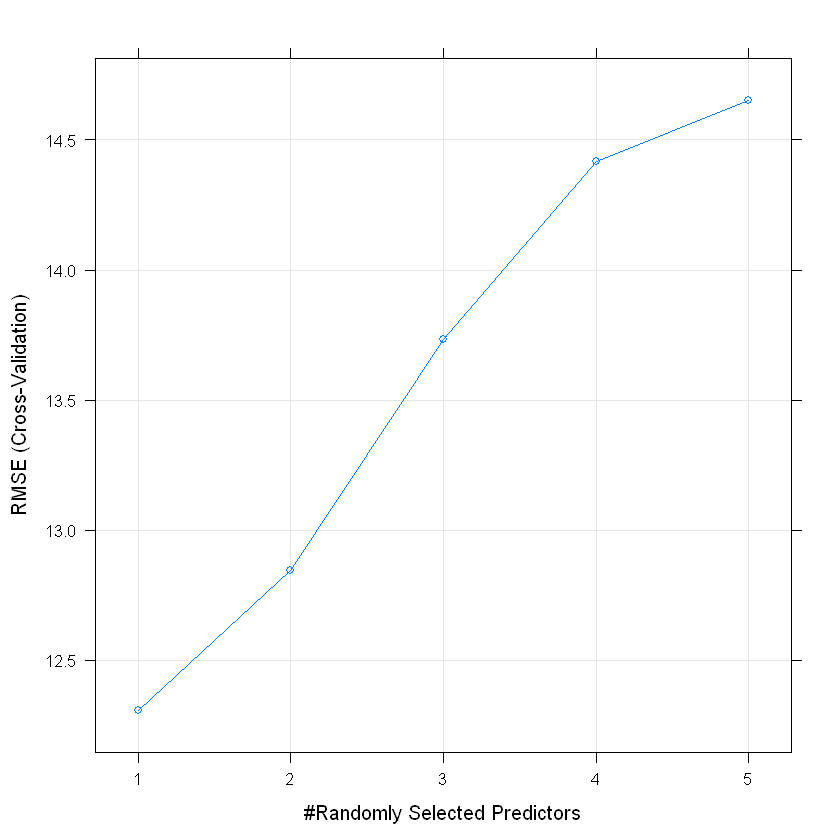

In [15]:
require("insuranceData")
require("caret")

# Bring the AutoBi data into our environment
data(AutoBi)

# Only use complete cases (exclude NAs)
AutoBi <- AutoBi[complete.cases(AutoBi),]

# Use the caret::createDataPartition to create train and test indices
train_index <- createDataPartition(AutoBi$LOSS, times = 1, p = 0.6, list = FALSE)

# Split the data sets and Count the training and test rows
data.train = AutoBi[train_index,]
data.test = AutoBi[-train_index,]

# Count the rows in each split
nrow(data.train) # ~600
nrow(data.test) # ~400
nrow(data.train)/(nrow(data.train) + nrow(data.test)) # ~60%

# Setup 10-fold CV using caret
fitControl <- trainControl(## 10-fold CV
  method = "cv", # alternatively could be "boot" for bootstrapping
  number = 10
  )

set.seed(825)

# Perform a glm fit with 10-fold CV
glmFit1 <- train(LOSS ~ c(ATTORNEY) + CLMSEX + c(MARITAL) + c(CLMINSUR) + SEATBELT + CLMAGE
                 ,data = data.train
                 ,method = "glm"
                 ,trControl = fitControl
                 )
glmFit1
summary(glmFit1)

# The caret package makes it easy to tune model parameters
tunegrid <- expand.grid(mtry=c(1:5))
set.seed(1)
control <- trainControl(method="cv", number=10, repeats=3)

# Fitting random forest models using 10-folds cross-validation
# includes tuning the number of features tried at each split (mtry)
rf.Fit1 <- train(LOSS ~ c(ATTORNEY) + CLMSEX + c(MARITAL) + + SEATBELT + CLMAGE
                 ,data = data.train
                 ,method = "rf"
                 ,tuneGrid = tunegrid
                 ,trControl = control
                 )

# caret trains the models and selects the best mtry value based on minimizing RMSE
rf.Fit1
rf.Fit1$results

# Plot the impact of increased complexity (ie increasing mtry on RMSE)
plot(rf.Fit1)

# caret saves the best model
rf.Fit1$finalModel

# Printing the importance of each feature
importance(rf.Fit1$finalModel)

# DECISION TREES

**Leaf Nodes:**
* Final segments (nodes) created by algorithm.
* Can be used to get the class or regression estimate of the target.

**Balanced Binary Tree**
* Binary tree in which left and right subtrees of any node differe by depth of at most one.  

**Binary Tree**
* A tree structure in which each node has two children.  

**Child**
* A node directly connected to another node when moving away from the root  In most tree depictions - the child node appears below its parent node.  

**Depth**
* The number of edges from the tree's root node to the "furthest" leaf.

**Entropy**
* Measure of impurity of each node in a decision tree.
* There are other measures of impurity - but entropy is common.
* Entropy for a segment of data (node) is:  
* **Entropy:**$=\sum_{i = 1}^{C} p_{i}log_{2}(p_{i})$
* C = number of target classes (often 2).
* $p_i$ sums to one ; represents proportion of each target class present in node.
* Note:  customary to take log base 2.  

**What it tells us:**
* If all data are from the same class:   entropy = 0
* If data is evenly split between classes: entropy = 1
* Look for splits with entropy closer to 0.

# INFORMATION GAIN #
* With decision trees - we use entropy to split the data into smaller groups that help us improve the overall impurity of the resulting groups.
* Call this improvement in overall impurity: information gain resulting from the split.
* In order to pick the best split - calculate information gain from all possible splits and choose the best.


$Information Gain (P,A,S) = Entropy(parent) - \sum_{k=1}^{K}\frac{N_k}{N_p} Entropy(Child_k)$
* P = Parent Node ; A = feature on which we are performing split ; S defines the Split
* k = number of children resulting from split
* $N_p$ = Number of observations in the segment given by parent node.
* $N_k$ = Number of observations in the segment givent by the kth child node.
* Measures the reduction in entropy resulting from chosen split.

**Bis in Information Gain**
* Natural bias in information gain that favors categorical features with many levels.
* Can address by grouping or using a different metric (gain ratio instead of information gain).

# GINI #
* Gini is an alternative to Entropy.
* "Gini impurity is a measure of how often a randomly chosen element from the [segment] would be incorrectly classified if it were randomly classified according to the distributions of targets in the subset."  
* $Gini(N) = 1 - \sum_{i = 1}^{C}p^2_i$
* Goal is to make Gini as small as possible by picking splits that maximize its reduction.

# Classification Error #
* Another example of impurity measure.
* $Classification Error (N) = 1 - max p_i$ (i = 1,...,c)

# CONTROL PARAMETERS #
* Minimum Split: Minimum number of observations that must exist in a node for a split to be attempted.
* Minimum Bucket Size: Minimum number of observations that must exist in a terminal node.  Usually use this OR Minimum Split.
* Complexity Parameter (CP): Indicates the minimum amount of impurity reduction required for a split to be made.
    * NOTE: Often there are valuable splits to be found AFTER invaluable splits.  This supports retroactive pruning.
* Depth: maximum depth of any node in the final tree.  Root node is counted as 0.  Controls complexity of tree - similar to setting max number of nodes.

# REGRESSION DECISION TREE #
* For the most part - same as classification.
* Instead of Gini etc. for impurity - use Residual Sum of Squares.

**FINAL NOTES ON DECISION TREES**
* Use of R-Squared Impurity Measure assumes our data has a Gaussian Distribution (or at least is symmetric).
* Insurance Data is often ~ Poisson so R-Squared is subpotimal.  Alternative splitting measures are available.
* Look at literature on implementing Poisson regression using decision trees.

# DECISION TREE - CODING #

**Prepare the Data**

In [21]:
library(caret)
# Load data and take a quick look at the summary
data.all <- read.csv("BreastCancerWisconsinDataSet.csv")

# Some simple cleaning and set up
 
 # set the target 
data.all$target [data.all$diagnosis == "M"] = 1
data.all$target [data.all$diagnosis == "B"] = 0

 # all variables available for training
data.all <- data.all[, setdiff(colnames(data.all), c("diagnosis", "id", "X"))]

 # split data into training vs validation sets
set.seed(1000)
training.indices <- createDataPartition(data.all$target, p = 0.7, list = FALSE)
data.training <- data.all[training.indices, ] 
data.validation <- data.all[-training.indices, ]

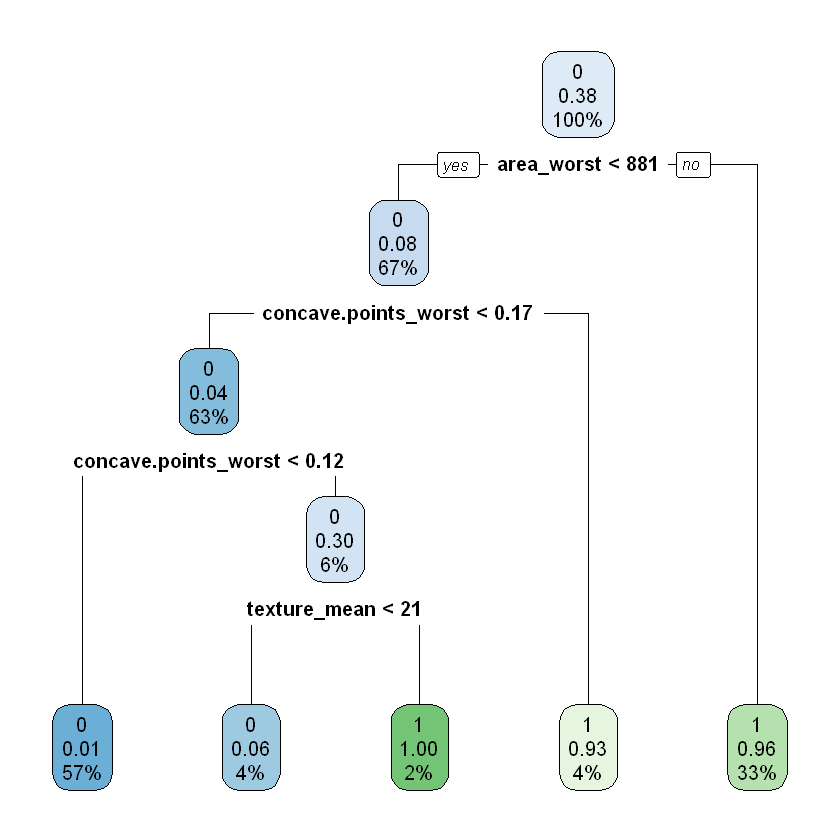

In [20]:
library(rpart)
library(rpart.plot)

# Set the formula with all variables
dt1.f <- as.formula(paste("target~", paste(colnames(data.training)[-31], collapse=" + ")))

# Fit a decision tree and save to dt1, method = 'class' ensures the target is treated as a categorical variable
dt1 <- rpart(dt1.f, data = data.training, method = 'class',
             control = rpart.control(minbucket = 5, cp = 0.00001, maxdepth = 5), 
             parms = list(split = "gini"))

# Plot the tree
rpart.plot(dt1)

**Print Summary**

In [22]:
print(dt1)

n= 399 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 399 150 0 (0.624060150 0.375939850)  
   2) area_worst< 880.75 266  22 0 (0.917293233 0.082706767)  
     4) concave.points_worst< 0.17175 252   9 0 (0.964285714 0.035714286)  
       8) concave.points_worst< 0.1223 229   2 0 (0.991266376 0.008733624) *
       9) concave.points_worst>=0.1223 23   7 0 (0.695652174 0.304347826)  
        18) texture_mean< 20.94 17   1 0 (0.941176471 0.058823529) *
        19) texture_mean>=20.94 6   0 1 (0.000000000 1.000000000) *
     5) concave.points_worst>=0.17175 14   1 1 (0.071428571 0.928571429) *
   3) area_worst>=880.75 133   5 1 (0.037593985 0.962406015) *


**Look at the Complexity Parameter**


Classification tree:
rpart(formula = dt1.f, data = data.training, method = "class", 
    parms = list(split = "gini"), control = rpart.control(minbucket = 5, 
        cp = 1e-05, maxdepth = 5))

Variables actually used in tree construction:
[1] area_worst           concave.points_worst texture_mean        

Root node error: 150/399 = 0.37594

n= 399 

       CP nsplit rel error  xerror     xstd
1 0.82000      0      1.00 1.00000 0.064501
2 0.08000      1      0.18 0.23333 0.037671
3 0.02000      2      0.10 0.18667 0.034016
4 0.00001      4      0.06 0.18000 0.033448


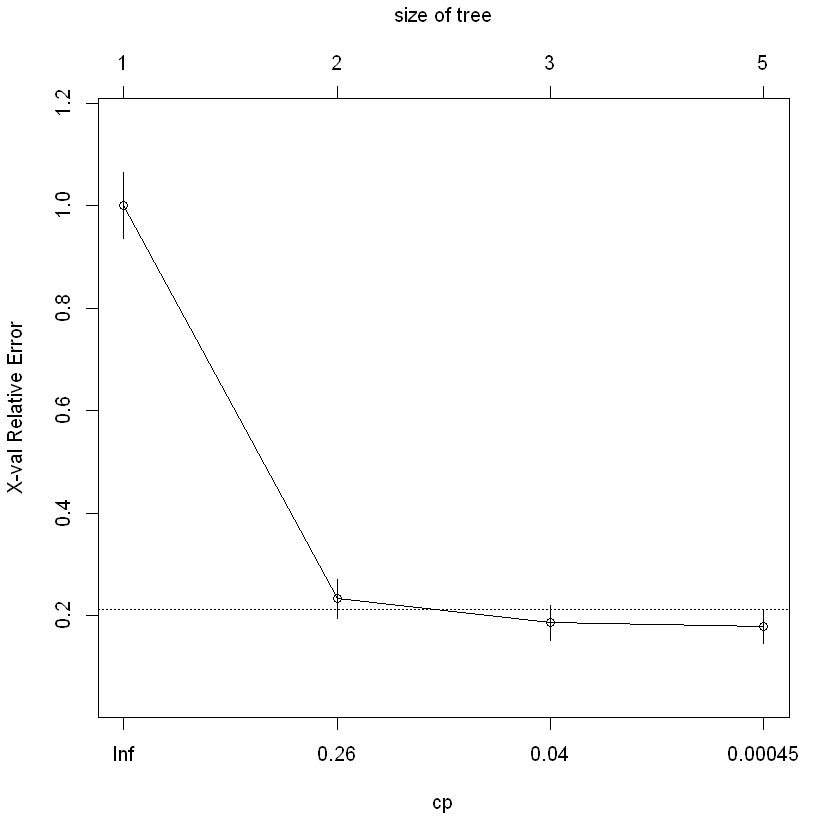

In [23]:
printcp(dt1)
plotcp(dt1)

In [24]:
dt1$cptable[which.min(dt1$cptable[, "xerror"]), "CP"]

[1] 1e-05

**Prune the Tree**

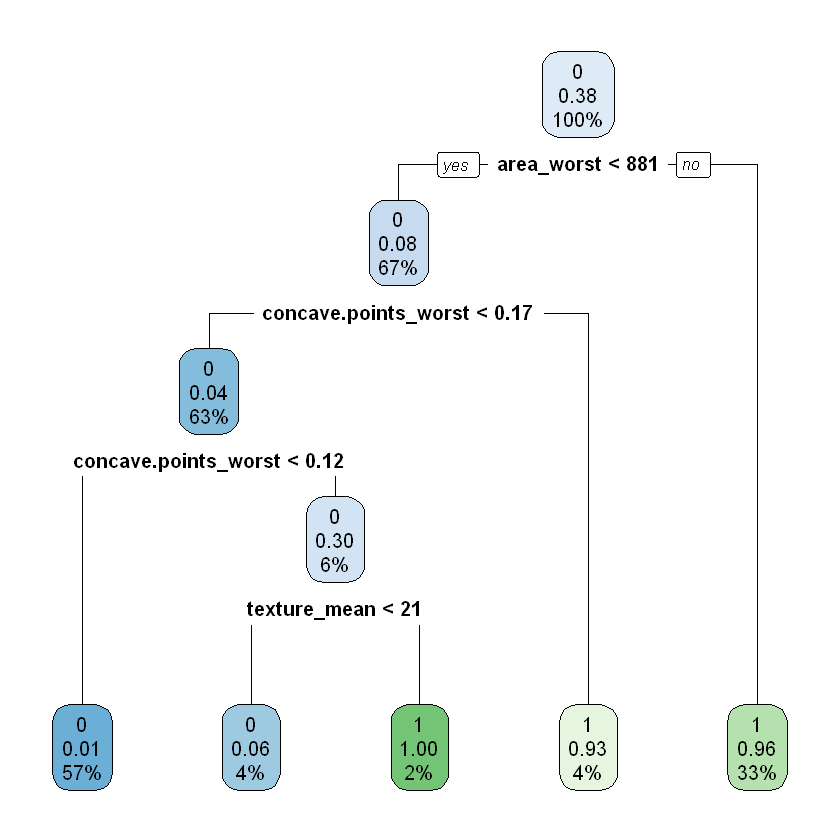

In [25]:
pdt1<- prune(dt1, cp = dt1$cptable[which.min(dt1$cptable[, "xerror"]), "CP"])

# Plot the tree
rpart.plot(pdt1)

**Use Caret to find optimal value of all decision tree parameters**

CART 

399 samples
 30 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (4 fold) 
Summary of sample sizes: 298, 300, 300, 299 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.01666667  0.9272435  0.8451478
  0.08000000  0.9172935  0.8206061
  0.82000000  0.9097177  0.8034364

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01666667.

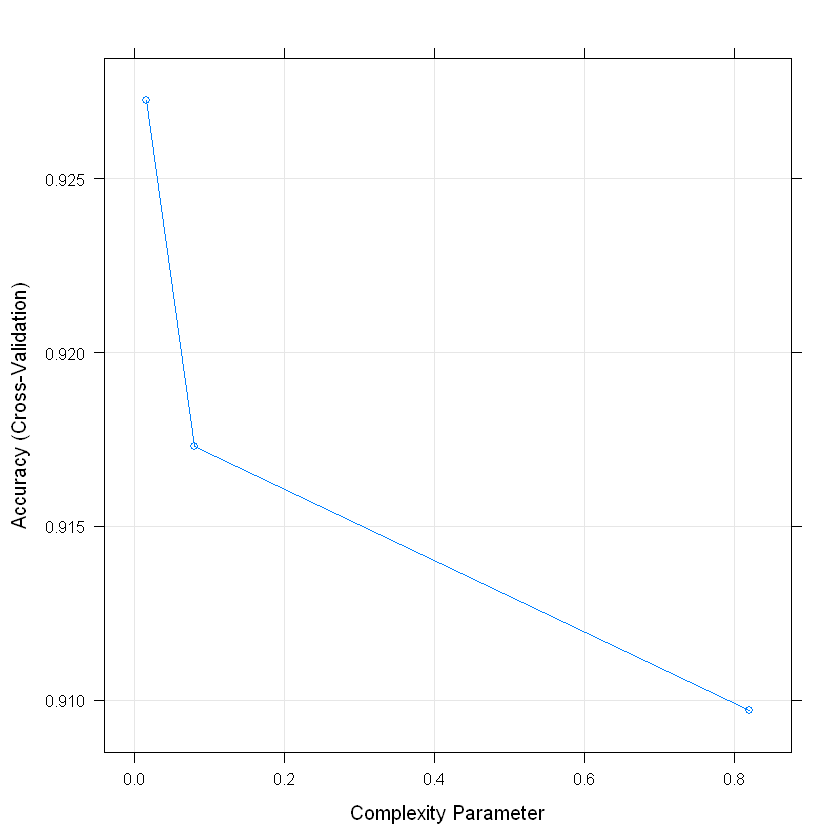

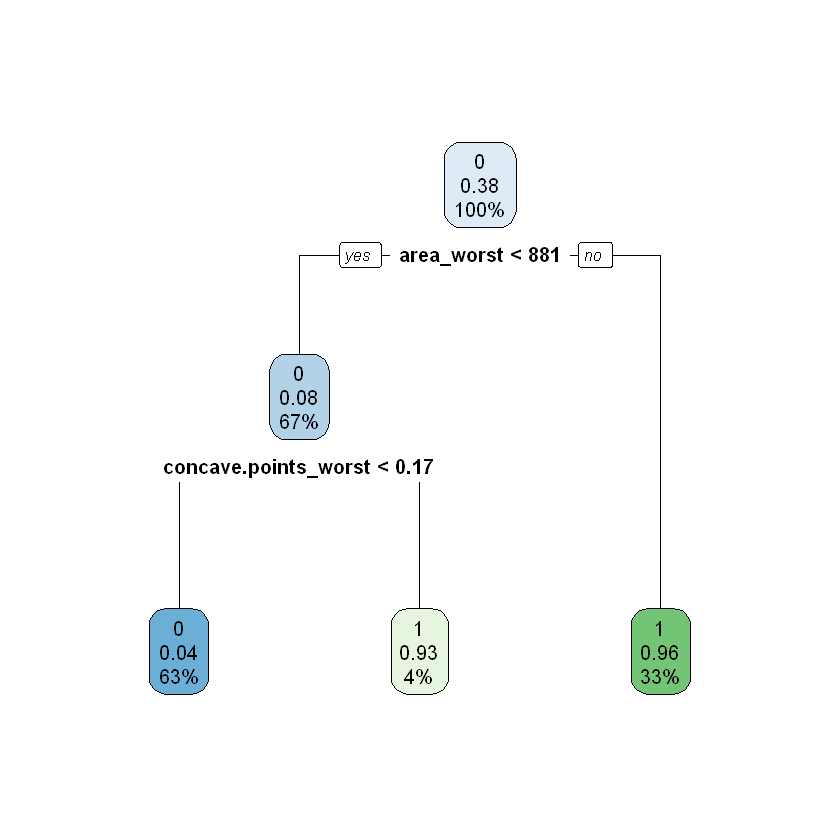

In [26]:
library(caret)

# Set the cross validation parameters for training. Here we are using 4-fold cross validation
ctrl <- trainControl(method = "cv",
                     number = 4)

# Set the target as a 2-level factor (caret requires this to be explicit)
data.training$target <- as.factor(data.training$target)

# Train the model
dt.caret <- train(dt1.f, # Use the same formula as before
                  data.training,
                  method = "rpart",
                  trControl = ctrl)

plot(dt.caret)
dt.caret

# We can access the optimal model through $finalModel
rpart.plot(dt.caret$finalModel)


**Multi-Output Problem**

CART 

350004 samples
     6 predictor
     7 classes: 'GI', 'MP', 'NM', 'NO', 'OT', 'SI', 'TC' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 280002, 280003, 280005, 280002, 280004 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.004286705  0.5764534  0.3069064
  0.007860766  0.5686706  0.2734550
  0.087934361  0.5276860  0.1528413

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.004286705.

n= 350004 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 350004 184524 MP (0.026 0.47 0.34 0.066 0.09 0.00097 0.0041)  
   2) distchanI>=0.5 95241  33084 MP (0.046 0.65 0.13 0.14 0.035 3.1e-05 0.00021) *
   3) distchanI< 0.5 254763 147799 NM (0.019 0.41 0.42 0.039 0.11 0.0013 0.0055)  
     6) issage>=44.5 102360  48110 MP (0.013 0.53 0.25 0.056 0.14 0.0014 0.012)  
      12) prodcatUL< 0.5 79433  32542 MP (0.016 0.59 0.24 0.067 0.073 0.0018 0.013) *
      13) prodcatUL>=0.5 22927  14555 OT (0.0048 0.32 0.28 0.018 0.37 0.00017 0.01)  
        26) smokerU>=0.5 3107   1074 NM (0.0013 0.29 0.65 0.0039 0.047 0 0.008) *
        27) smokerU< 0.5 19820  11593 OT (0.0053 0.33 0.22 0.021 0.42 0.0002 0.01) *
     7) issage< 44.5 152403  70878 NM (0.023 0.32 0.53 0.027 0.091 0.0013 0.00094) *

       GI                 MP               NM               NO          
 Min.   :0.001287   Min.   :0.2858   Min.   :0.1289   Min.   :0.003862  
 1st Qu.:0.015560   1st Qu.:0.3220   1st Qu.:0.1289   1st Qu.:0.027480  
 Median :0.022526   Median :0.5903   Median :0.2393   Median :0.067038  
 Mean   :0.026204   Mean   :0.4737   Mean   :0.3397   Mean   :0.065953  
 3rd Qu.:0.045926   3rd Qu.:0.6526   3rd Qu.:0.5349   3rd Qu.:0.137084  
 Max.   :0.045926   Max.   :0.6526   Max.   :0.6543   Max.   :0.137084  
       OT                SI                  TC           
 Min.   :0.03524   Min.   :0.0000000   Min.   :0.0002100  
 1st Qu.:0.03524   1st Qu.:0.0000315   1st Qu.:0.0002100  
 Median :0.07300   Median :0.0012533   Median :0.0009383  
 Mean   :0.08939   Mean   :0.0009672   Mean   :0.0040762  
 3rd Qu.:0.09088   3rd Qu.:0.0012533   3rd Qu.:0.0103935  
 Max.   :0.41509   Max.   :0.0017751   Max.   :0.0129921  

GI    MP    NM    NO    OT    SI    TC 
    0 75282 66284     0  8430     0     0

GI    MP    NM    NO    OT    SI    TC 
 3922 70919 51102  9853 13446   144   610

[1] 0.5748087

    preds.multiclass
        GI    MP    NM    NO    OT    SI    TC
  GI     0  2461  1423     0    38     0     0
  MP     0 46944 21213     0  2762     0     0
  NM     0 13519 35731     0  1852     0     0
  NO     0  7884  1799     0   170     0     0
  OT     0  3921  5981     0  3544     0     0
  SI     0    58    86     0     0     0     0
  TC     0   495    51     0    64     0     0

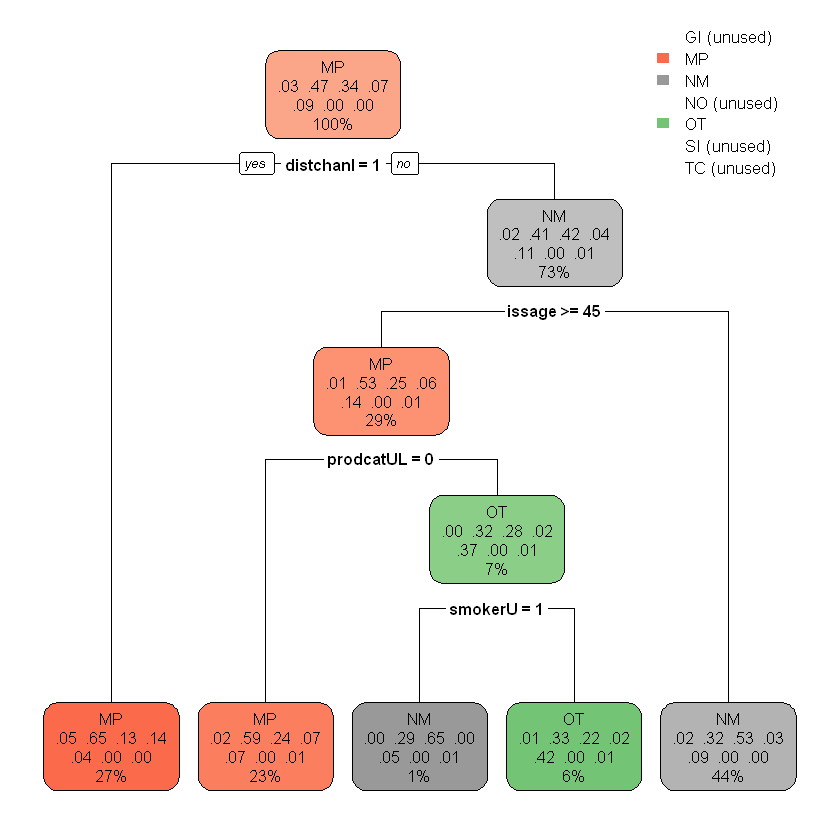

GI    MP    NM    NO    OT    SI    TC 
    0 74023 64988  2677  8308     0     0

[1] 0.5791354

    preds.binary
        GI    MP    NM    NO    OT    SI    TC
  GI     0  2462  1422     0    38     0     0
  MP     0 46614 20821   841  2643     0     0
  NM     0 14306 34910    36  1850     0     0
  NO     0  6091  1793  1800   169     0     0
  OT     0  3986  5916     0  3544     0     0
  SI     0    59    85     0     0     0     0
  TC     0   505    41     0    64     0     0

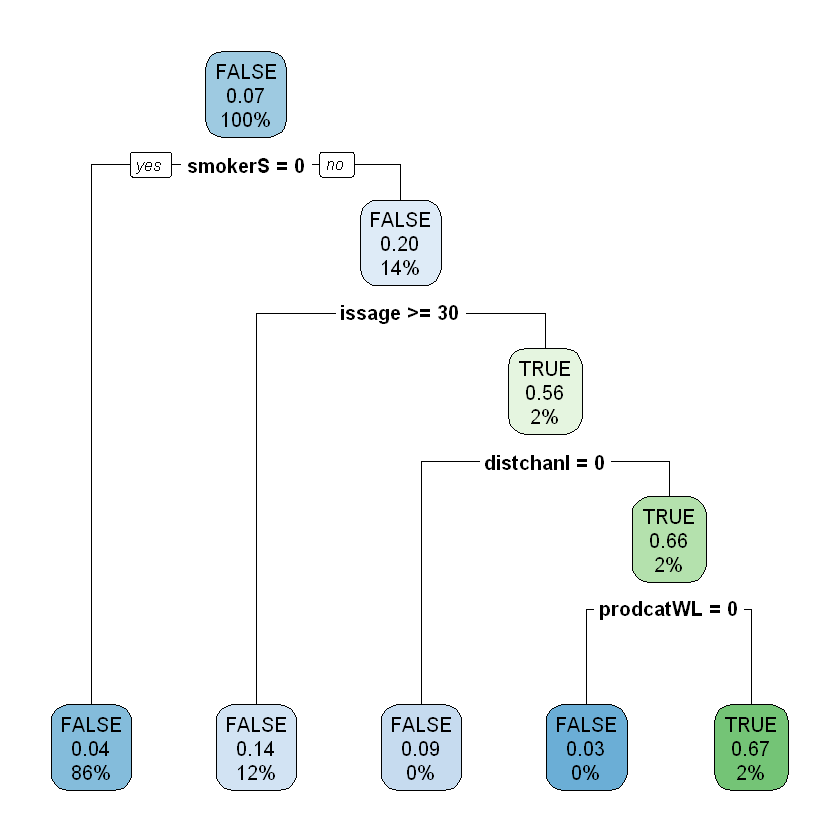

In [27]:
library(rpart)
library(rpart.plot)

data.mortality <- read.csv("soa_mortality_data.csv")

data.mortality$target <- data.mortality$uwtype

## Split data into training and validation data sets
training.indices <- createDataPartition(data.mortality$target, p = 0.7, list = FALSE)
data.training <- data.mortality[training.indices, ] 
data.validation <- data.mortality[-training.indices, ]

## Part 1: Fit a single multiclass tree

# Create the formula (here we just use an arbitrary subset of the features, in reality you would perform feature selection etc.)
formula.dt <- as.formula("target ~ smoker + sex + prodcat + region + issage + distchan")

# Set the cross validation parameters
ctrl <- trainControl(method = "cv",
                     number = 5)

# Fit the multi-class tree. rpart will automatically fit multi-class because the target variable has more than two values
dt.multiclass <- train(formula.dt,
                  data.training,
                  method = "rpart",
                  trControl = ctrl)

# Look at summary of the model
dt.multiclass
dt.multiclass$finalModel

# plot the tree 
rpart.plot(dt.multiclass$finalModel)

## Test the tree on the validation set

# Look probabilities of being each class
preds.multiclass.prob<- predict(dt.multiclass, newdata = data.validation, type = "prob")
summary(preds.multiclass.prob)

# Look instead at actual assigned UW type (class corresponding to max of all class probabilities for an observation)
preds.multiclass <- predict(dt.multiclass, newdata = data.validation, type = "raw")
summary(preds.multiclass)

# We can get an initial idea of how the tree is doing by comparing the distributions of predicted and actual
# This is a quick sense check to make sure it isn't doing something unexpected
summary(data.validation$uwtype)

# Calculate classification accuracy 
accuracy.multiclass <- sum(preds.multiclass == data.validation$uwtype) / nrow(data.validation)
accuracy.multiclass

# Look at a table of actual vs predicted (diagonal are correct predictions)
table(data.validation$uwtype, preds.multiclass)

## Exercise 2: Fit multiple binary trees

# Set up an object to store all of the trees and their predictions
trees.binary <- list()
preds.binary.raw <- data.frame(row.names = 1:nrow(data.validation))

# Do a for loop to run through each of the UW types (note this may take a while)
for (type in levels(data.mortality$uwtype)) {
  
  # Set the target
  data.training$target <- as.factor((data.training$uwtype == type))
  data.validation$target <- as.factor((data.validation$uwtype == type))
  
  # We will use the same parameters set up in the previous exercise
  
  # Fit the tree
  dt.binary <- train(formula.dt,
                     data.training,
                     method = "rpart",
                     trControl = ctrl)
  
  # Store the model (for inspection later)
  trees.binary[[type]] <- dt.binary
  
  # Get the predictions on the validation set (we only want the probability of true)
  preds.binary.raw[,type] <- predict(dt.binary, newdata = data.validation, type = "prob")[,"TRUE"]
}

# Inspect one of the trees:
rpart.plot(trees.binary[["NO"]]$finalModel)

# Calculate the prediction of all binary trees in combination by taking the maximal probability
preds.binary <- factor(colnames(preds.binary.raw)[apply(preds.binary.raw, MARGIN = 1, FUN = which.max)], levels = levels(data.validation$uwtype))
summary(preds.binary)

# Calculate the accuracy of the binary tree approach
accuracy.binary <- sum(preds.binary == data.validation$uwtype) / nrow(data.validation)
accuracy.binary

# SHow the prediction table
table(data.validation$uwtype, preds.binary)

# The results are too close to call. 
# Ultimately it depends on the data and its structure as to which is the "better" method - 
# we save a considerable amount of time going down the multiclass approach however, and due to its ability to capture output value correlations, where possible, multiclass is usually preferred.



**Decision Tree using autoclaim dataset from the cplm library**

In [28]:
library(cplm)

set.seed(1000)

# Filter to CLM_AMT5 > 0 -> this is our target
# CLM_AMT5 is the total claim amount in the past 5 years
AutoClaim <- cplm::AutoClaim
AutoClaim <- AutoClaim[which(AutoClaim$CLM_AMT5 > 0), ]

# Split data to training and validation
training.indices <- createDataPartition(AutoClaim$CLM_AMT5, p = 0.7, list = FALSE)
AutoClaim.training <- AutoClaim[training.indices, ] 
AutoClaim.validation <- AutoClaim[-training.indices, ]

summary(AutoClaim)

Loading required package: coda
Loading required package: splines


   POLICYNO            PLCYDATE            CLM_FREQ5        CLM_AMT5    
 Length:4006        Min.   :1993-04-30   Min.   :1.000   Min.   :  502  
 Class :character   1st Qu.:1994-11-25   1st Qu.:1.000   1st Qu.: 3645  
 Mode  :character   Median :1996-05-26   Median :2.000   Median : 6014  
                    Mean   :1996-05-22   Mean   :2.057   Mean   :10363  
                    3rd Qu.:1997-11-24   3rd Qu.:3.000   3rd Qu.: 9722  
                    Max.   :1999-07-07   Max.   :5.000   Max.   :57037  
                                                                        
    CLM_AMT          KIDSDRIV         TRAVTIME           CAR_USE    
 Min.   :     0   Min.   :0.0000   Min.   : 5.00   Private   :2339  
 1st Qu.:     0   1st Qu.:0.0000   1st Qu.:23.00   Commercial:1667  
 Median :     0   Median :0.0000   Median :33.00                    
 Mean   :  2313   Mean   :0.1985   Mean   :33.42                    
 3rd Qu.:  3434   3rd Qu.:0.0000   3rd Qu.:44.00                    
 M

**Get a (VERY LONG) Summary**

In [ ]:
summary(dt2)

**Prune and Summarize**

In [29]:
pdt2 <- prune(dt2, cp = dt2$cptable[which.min(dt2$cptable[, "xerror"]), "CP"])
print(pdt2)
summary(pdt2)

ERROR: Error in prune(dt2, cp = dt2$cptable[which.min(dt2$cptable[, "xerror"]), : object 'dt2' not found


# GENERALIZED LINEAR MODEL #

**Linear Models**
* $Y = \beta_0 + \beta_1x + \epsilon_i$
* Linear relationship.
* $\epsilon$ is the error term or random component that accounts for error in the prediction.  

**COEFFICIENTS**
* $\beta_1$ represents the unit change in Y for a 1 unit change in x.

**General Model**
* $Y = \beta_0 + \beta_1x_1 + ... + \beta_px_p + \epsilon_i$
* Linear Relationship is between target variable and predictor variables.
* Error term is additive.
* Observations are independent.

**Estimating the Parameters**
* Linear Models use the method of Ordinary Least Squares (OLS).
* Goal is to determine parameter values that minimize Sum of Squared Errors (SSE) - also called Sum of Squared Residuals (SSR).
* SSE = SSR = $\sum_{i=1}^n(\hat{y}_i-y_i)^2$
* With the added assumtption of Normal distribution for $\epsilon$ - this is the maximum likelihood estimate.

**Design Matrix**
* Many programs automatically create.  Some don't - plus it is useful to understand.
* $Y = X\beta + \epsilon$
* X is called the Design Matrix.
* X is (n x p+1) ; a row for each observation ; a column for each independent variable (plus a column of 1s for intercept).
* In R - just use lm() which takes care of all the matrix algebra.  

**Understand the Statistics**
* p-value
* residual standard error
* degrees of freedom
* multiple R-Squared
* adjusted R-Squared
* F-Statistic  

**Normal Distribution Assumption**
* NOTE: the assumption of Normal Distribution does not relate to the aggregate of the observed items - but to each observation individually.
* For example:  Height of men and women are both normally distributed - but overall height is bimodal.
* Least Squares is an objective or loss function and can always be used.  However - for various statistical tests, confidence intervals, etc - additional assumptions must hold.

# Problems with the Ordinary Linear Model #
* Range of target variable is positive - Normal allows for negative.
* Variance depends on the mean - violates the constant variance assumption.
* Target Variable is binary - does not fit normal distribution.  

**Additional Limitations**
* Linear Models are sensitive to outliers.
* Do not perform well with nonlinear relationships - but may be addressed with transformations.

**GLMs**
* Consist of a wide range of models - of which Ordinary Linear Model is a special case.
* GLM Assumptions are:
    * Given the predictor variable values - target variables are independent (this is unchanged from OLM).
    * Given the predictor variable values - target variable distribution is a member of the exponential family.
    * Given the predictor variable values - the expected value of the target variable is $\mu = g^{-1}(\eta) ; \eta = X\beta$
        * g is called the link function and $g^{-1}$ is its inverse.
* If the conditional distribution of the target variable is normal (which is a member of the exponential family) and identity link function - we have ordinary regression model.

# EXPONENTIAL FAMILY #
* Set of distributions with a specific parameterization.
* Variance is related to mean through variance function. 

**Common Examples**
* Normal: $V(\mu) = 1$
* Poisson: $V(\mu) = \mu$
* Gamma: $V(\mu) = \mu^2$
* Binomial $V(\mu) = \mu(1-\mu)$ (where number of trials is one)
* Inverse Gaussian: $V(\mu) = \mu^3$

**LINK FUNCTION: g**
* Before GLMs:  data would be transformed in an attempt to have linear conditions hold.
* GLMs also use a transformation - but it is to specify the model - not to change the data.
* Subtle Difference: Suppose you have 2 predictor variables:
    * OLM with log transform: $lnY = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon$ OR $Y = exp(\beta_0)exp(\beta_1x_1)exp(\beta_2x_2)exp(\epsilon)$ - a multiplicative model with the error term also multiplicative (with a lognormal distribution).
    * GLM with log link and Normal Distribution: Y ~ Normal ; $ln(\mu) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon$ - thus the GLM model is: Y~N$[exp(\beta_0 + \beta_1x_1 + \beta_2x_2),\sigma^2]$ ; this forces the predictive mean to be non-negative, but places no restrictions on possible values of Y.  To force positive values - a distribution such as Gamma would be needed.  
    
**COMMON LINK FUNCTIONS**
* Identity: g(n) = n
* Log: g(n) = log(n)
* Reciprocal: g(n) = 1/n
* Logit: g(n) = log(p/(1-p))

# TWEEDIE DISTRIBUTION #
* An 'in-between' distribution of Poisson and Gamma where variance is between 1 and 2.
* Recall: Compound Poisson - N ~ Poisson($\lambda)$ and each claim ~ Gamma($\alpha,\beta$) --> total claims S ~ Tweedie.
* This distribution can be used with GLMs.

# OFFSET #

* In some cases - the coefficient is known and does not need to be estimated.
* Such a coefficient is called an offset - usually denoted: $\xi$

**Offset - Example**
* Model number of auto claims with only predictor being gender.
* Collected claims for 1000 drivers - but not all have the same exposure period.
* Goal is expected number of claims for a one year period.
* Suppose for driver i: $x_{i1} = 1$ for male drivers and $x_{i2}$ is the length of observation.
* Reasonable model for $Y_i$, the number of claims, is $Y_i$ ~ Poisson[$x_{i2}exp(\beta_0 + \beta_1x_{i1})]$
* Exponentiated term is what we want to estimate (mean for the one year observation) - which is then modified to reflect actual observation period. Exponentiate to assure predicted values are positive.


**Log Link with Offset**  
$E(Y_i) = x_{i2}exp(\beta_0 + \beta_1x_{i1}) = exp(\eta)$ ---> $\eta = logx_{i2} + \beta_0 + \beta_{i2}$
* Model has 3 terms ; first one can be re-written: $\beta_2x_{i3}$ where $\beta_2 = 1$ and $x_{i3} = logx_{i2}$
* This is a legitimate GLM ; however we know value of $\beta_2$ - so don't need to estimate.
* Here $x_{i3}$ is called an offset rather than a predictor variable.

# GLM - SUMMARY #
* GLM for target variable Y and predictor variables $x_1,...,x_p$ is specified as follows:
* Mean of Y is E[Y] = $\mu = g^{-1}(\xi + \sum_{j=0}^p\beta_jx_j)$ where $x_0 = 1$ and g is an invertible link function.
* Variance of Y can be written $Var(Y) = \phi V(\mu)/\omega$ where the variance function depends on selected distribution.

* A good dataset for practice:  AutoClaim dataset in the cplm package.

**One Way Plots**
* Shows incidence rate and exposure by predictor levels.

**Selecting Initial Model**
* Target Variables 0 or 1: Binomial or Poisson
* Link Function: Log or Logit
* Claim Amount: Inverse Gaussian or Gaussian - continuous with only positive values - if there are 0s - Tweedie could be used
* Link Function:  Log - the only one that ensures positive predictions

**Understanding summary() Output**
* Coefficients: Can be used to make preditions.
* Asterisks indicate level of possible statistical significance.
* Confidence Intervals: 95% CI for each coefficient estimate.
* Deviance: GLM Goodness of Fit measure.  Similar to sum of squared errors.  Default is called null deviance = deviance measure when target is predicted using sample mean.  

**Hypothesis Tests**
* Likelihood Ratio Test:  Small p-value indicates highly significant variable.
* Fisher Scoring: Algorithm related to Newton's method for solving max likelihood problems numerically
* AIC: Based on deviance - but with a penalty for additional complexity.  Not good on an absolute basis - meant to be relative.

**Residuals**
* Residuals: Generally speaking - residuals are the differene between observed and predicted.  However - there are many variations.
* Deviance: sign(observed-predicted)$\sqrt{|2(observed)(log\frac{observed}{predicted} - (observed - predicted)|}$
    * Pearson = (observed-predicted)/sqrt(predicted)
    * Working = (observed-predicted)/predicted
    * Response = observed - predicted


# Interpret Residual Plots #
* Centered around y = 0 : Unbiased
* Dispersion has an increasing or decreasing pattern - heteroscedastic.

**Normal Q-Q Plot**
* Checks for Normality of residuals.
* Points should fall on a line if distribution is perfectly Gaussian.

**Interactions**
* GLM with only fixed or main effects is not likely to accurately capture real-world data.
* Fundamental relationship that is not captured in such a basic model is called an interaction.
* Interaction occurs when response depends on the relationship between a combination of features - rather than just the feature in isolation.

# MODEL EVALUATION #
**LIFT CHARTS**  
1. Compares fitted and actual for each predictor.
2. Checks for interactions, and if existing interactions are fitting properly.
3. Compares 2 models.

# ENSEMBLE METHODS #


# CODE #

* Generate some random data
* Use OLS to predict $y = x^2$

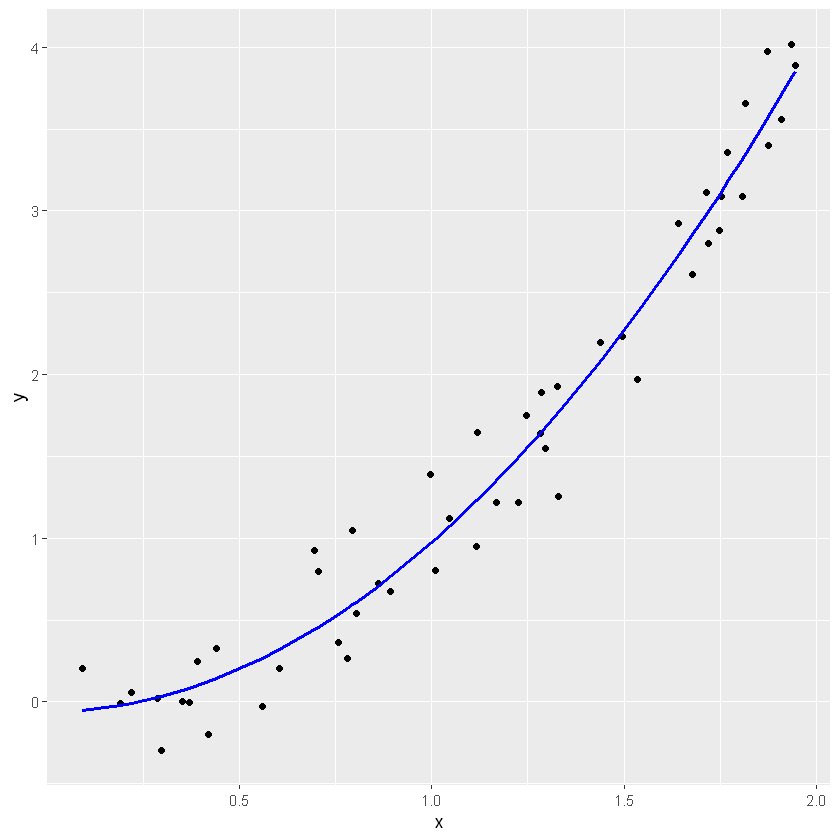

In [21]:
library(ggplot2)
x <- runif(50, min = 0, max = 2)
y <- x^2 + rnorm(50,0,0.25)
df <- data.frame(x = x, y = y, z = x^2)

m <- lm(y~df$z)

ggplot(data = df, aes(x = x)) + geom_point(aes(y = y)) + geom_line(aes(y=m$fitted.values), size = 1, color = "blue")

**Load some Packages**

In [30]:
library(ggplot2)
library(gridExtra)
library(data.table)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



**Load and Plot the Galton Dataset**

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: HistData
Loading required package: Hmisc
Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units


Attaching package: 'UsingR'

The following object is masked from 'package:survival':

    cancer



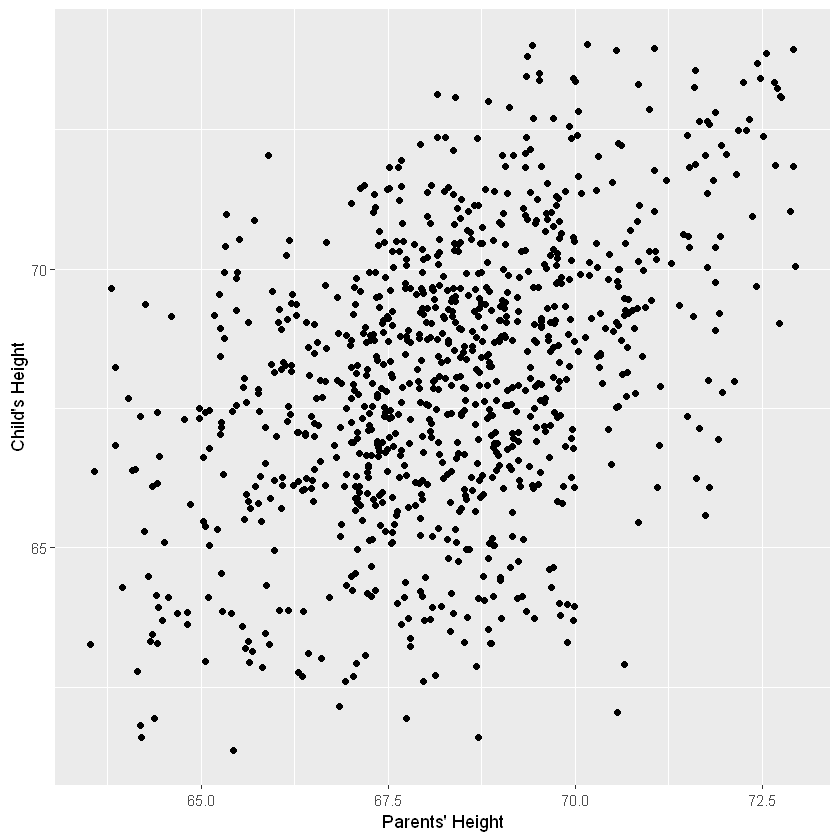

In [31]:
library(UsingR)
set.seed(1000)

data(galton)
ggplot(galton, aes(x = jitter(parent, 5), y = jitter(child, 5))) +
  geom_point() +
  labs(x = "Parents' Height", y = "Child's Height")

**Plot Regression Line**

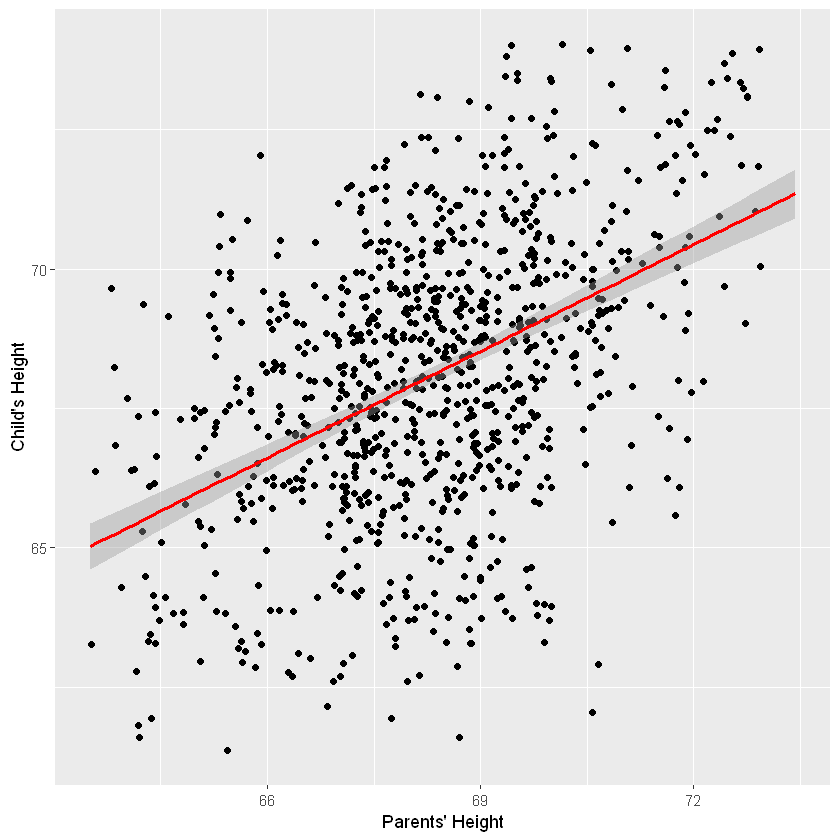

In [32]:
set.seed(1000)
ggplot(galton, aes(x = jitter(parent, 5), y = jitter(child, 5))) +
  geom_point() +
  labs(x = "Parents' Height", y = "Child's Height") +
  stat_smooth(method="lm", col = "red")

**Formally fit regression line using OLS**

In [33]:
lm_galton <- lm(child ~ parent, data = galton)
summary(lm_galton)


Call:
lm(formula = child ~ parent, data = galton)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8050 -1.3661  0.0487  1.6339  5.9264 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.94153    2.81088   8.517   <2e-16 ***
parent       0.64629    0.04114  15.711   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.239 on 926 degrees of freedom
Multiple R-squared:  0.2105,	Adjusted R-squared:  0.2096 
F-statistic: 246.8 on 1 and 926 DF,  p-value: < 2.2e-16


**Plot Regression Line**

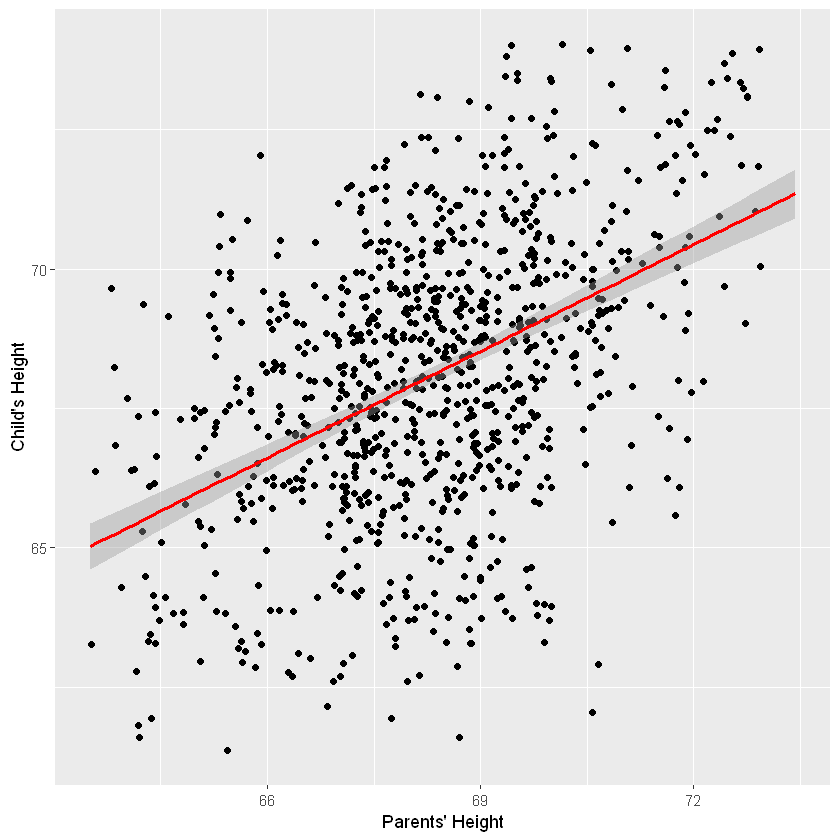

In [34]:
set.seed(1000)
ggplot(galton, aes(x = jitter(parent, 5), y = jitter(child, 5))) +
  geom_point() +
  labs(x = "Parents' Height", y = "Child's Height") +
  stat_smooth(method="lm", col = "red")

# ONE WAY PLOTS - LOOP THROUGH ALL VARIABLES #

In [37]:
library(cplm)
data(AutoClaim)
AutoClaim$CLM_FLAG_NUM <- ifelse(AutoClaim$CLM_FLAG == 'Yes', 1, 0)
not_used_vars <- c('POLICYNO', 'IN_YY')

$dframe
  Factor SumWeight SumActual AverageActual
2     no      7327      1968     0.2685956
1    yes      2969       772     0.2600202

$plot_table


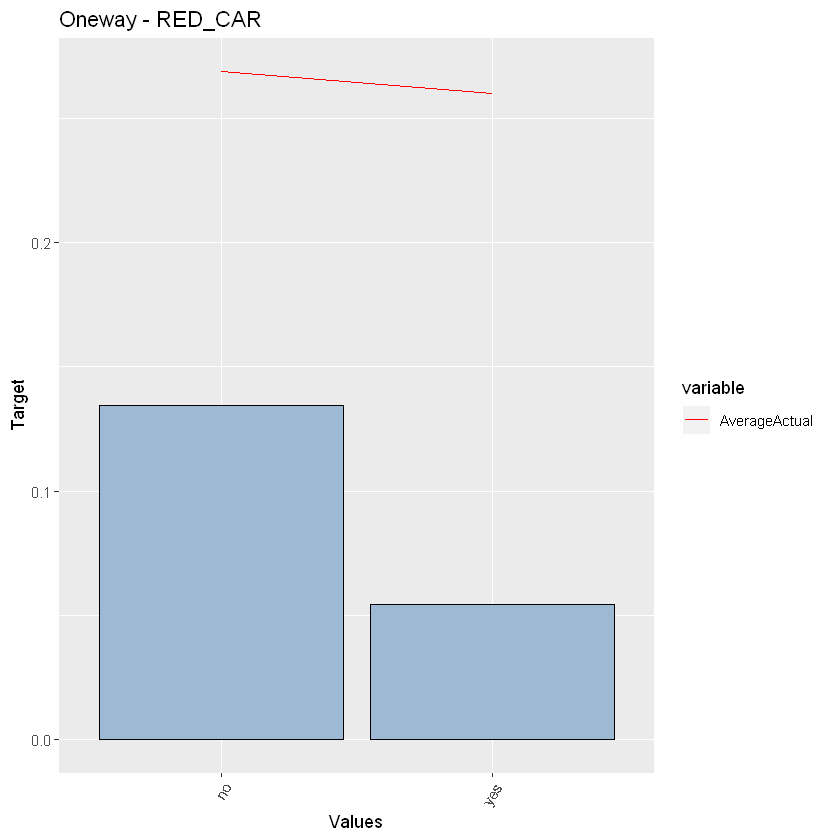

In [38]:
library(data.table)
#the inputs are the dataset, the predictor (x), the target (y), and the weights, if any
oneway_plot <- function(dataset, x, y, weight=NULL) 
{
  Weight = ifelse(is.null(weight), 1, dataset[,weight]) #sets the weights to 1 if none provided
  modeldata <- data.frame(
    Weight = Weight,
    Actual = dataset[,y],
    Factor = as.factor(dataset[,x]))
  
   dframe <- as.data.frame(data.table(modeldata)[ ,.(SumWeight = sum(Weight),
                                                   SumActual = sum(Actual),
                                                   AverageActual = sum(Actual)/sum(Weight)),
                                                 by = Factor])
    dframe <- dframe[order(dframe$Factor), ]
  dframe.melt <- melt(dframe [, c(1, 4)], id = c("Factor"))
  weight_max  <- max(dframe$SumWeight)
  resp_max    <- max(dframe.melt$value)
  
  plot1 <- ggplot(dframe, aes(x=Factor, y=SumWeight, group = 1)) +
    geom_bar(stat = "identity", aes(x = Factor, y = SumWeight*0.5*(resp_max)/(weight_max)),
             col = "black", fill = "#9EB9D4") +
    geom_line(data=dframe.melt, aes(x = Factor, y = value, color = variable, group = variable)) +
    scale_colour_manual(values = c("red")) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
    labs(title = paste("Oneway","-",x), x = "Values", y = "Target" )

  return(list(dframe=dframe, plot_table = plot1))
}
# Note you can use plotly() instead to make interactive graphs

# Example
oneway_plot(dataset = AutoClaim, x = "RED_CAR",  y = "CLM_FLAG_NUM",weight = "NPOLICY")

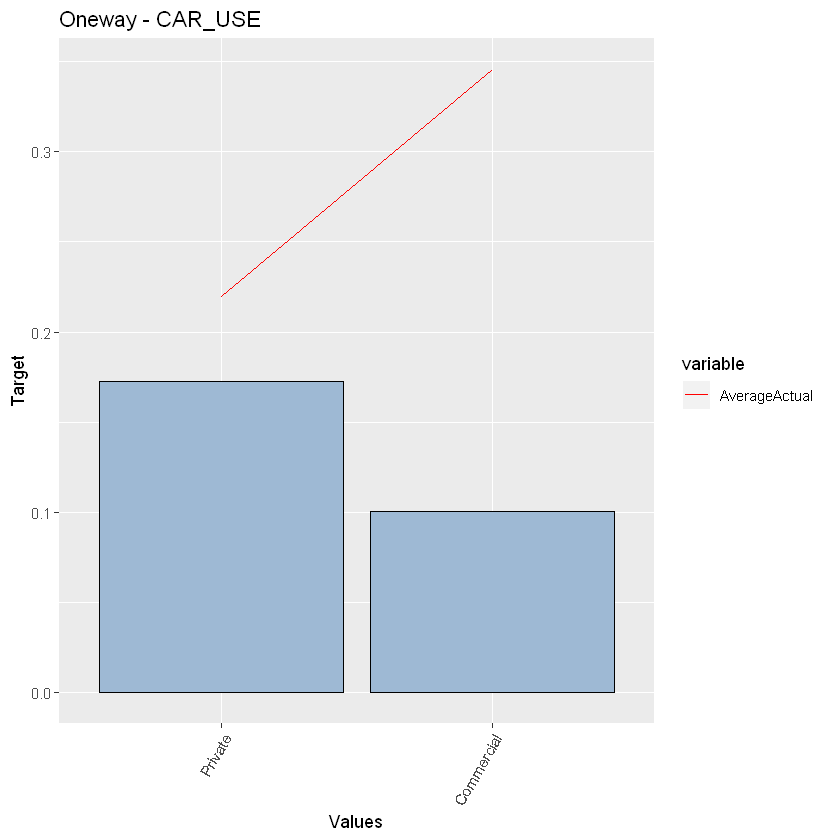

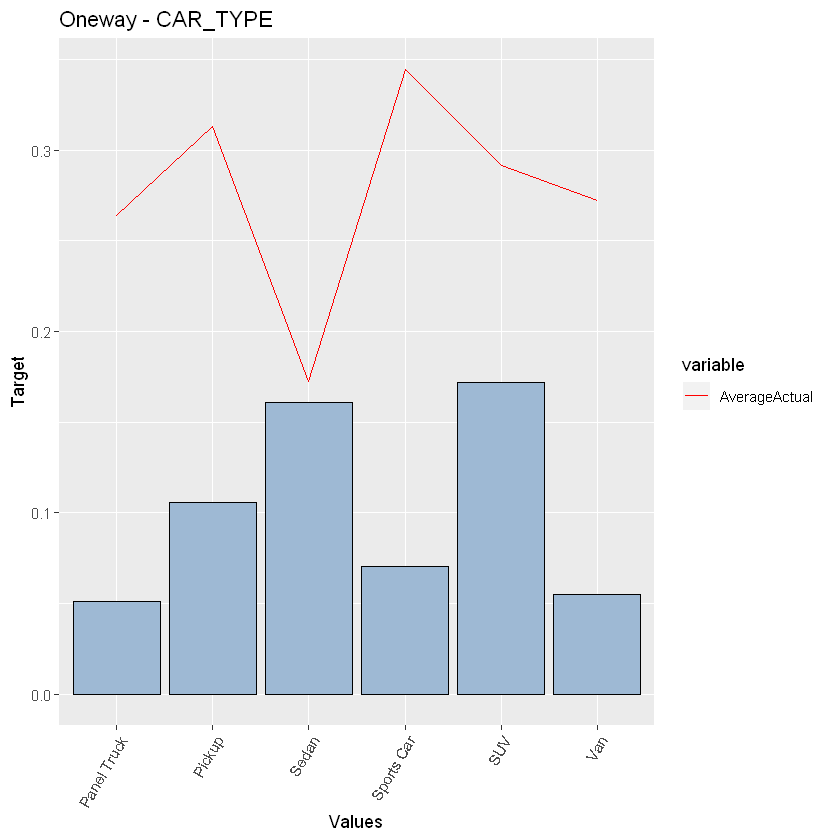

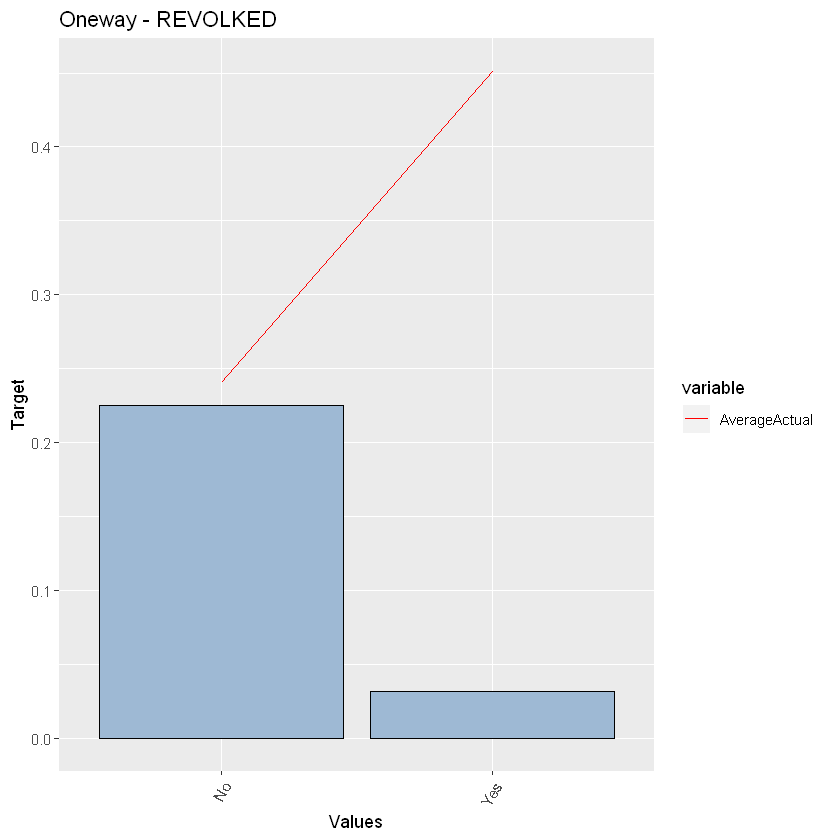

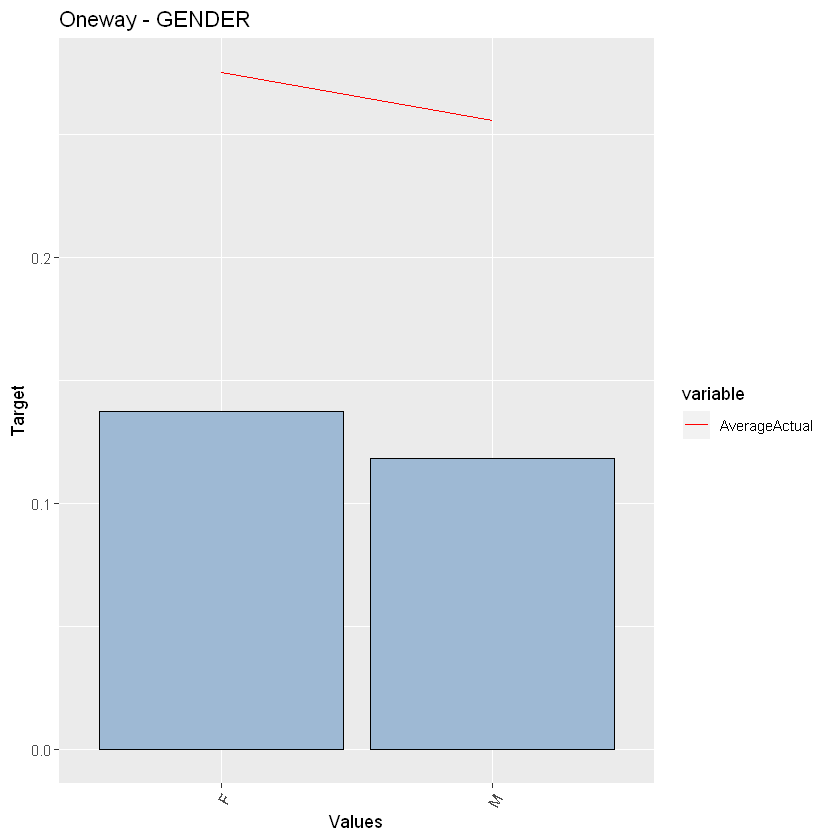

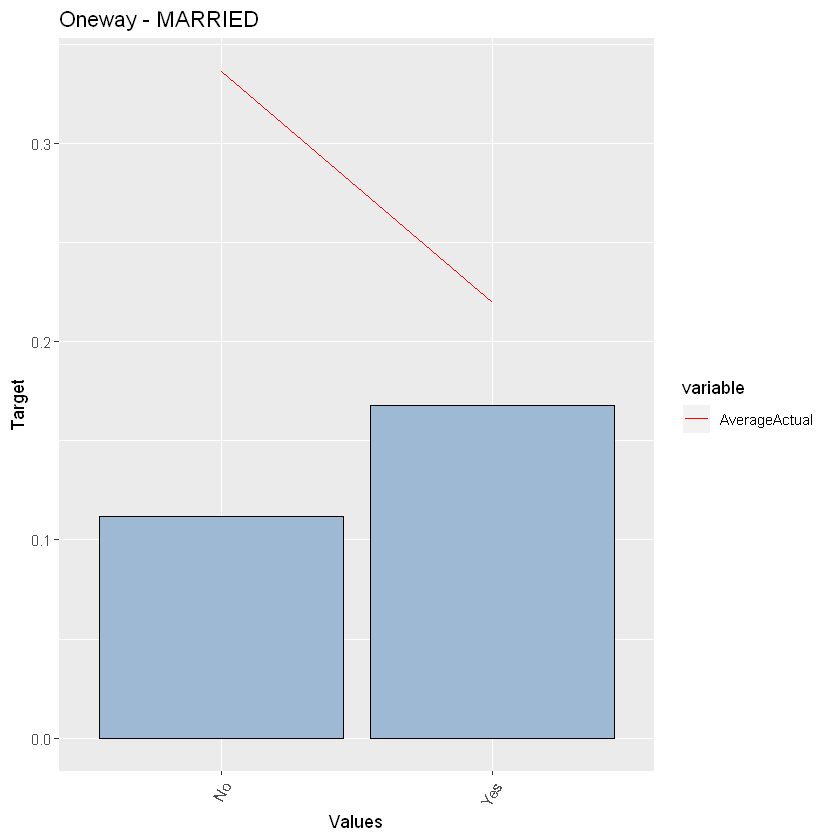

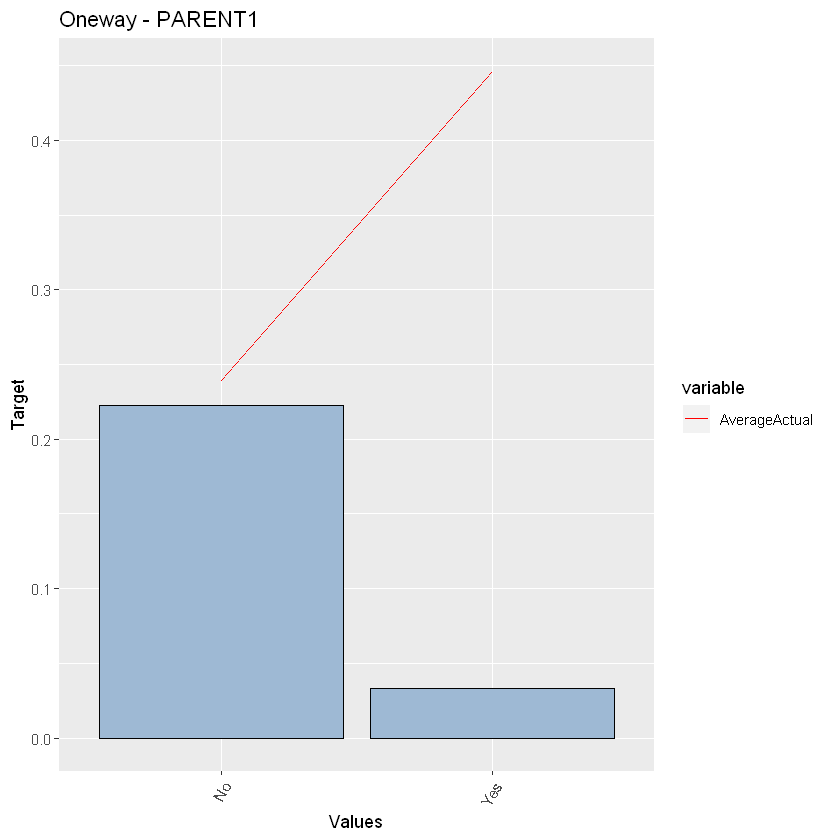

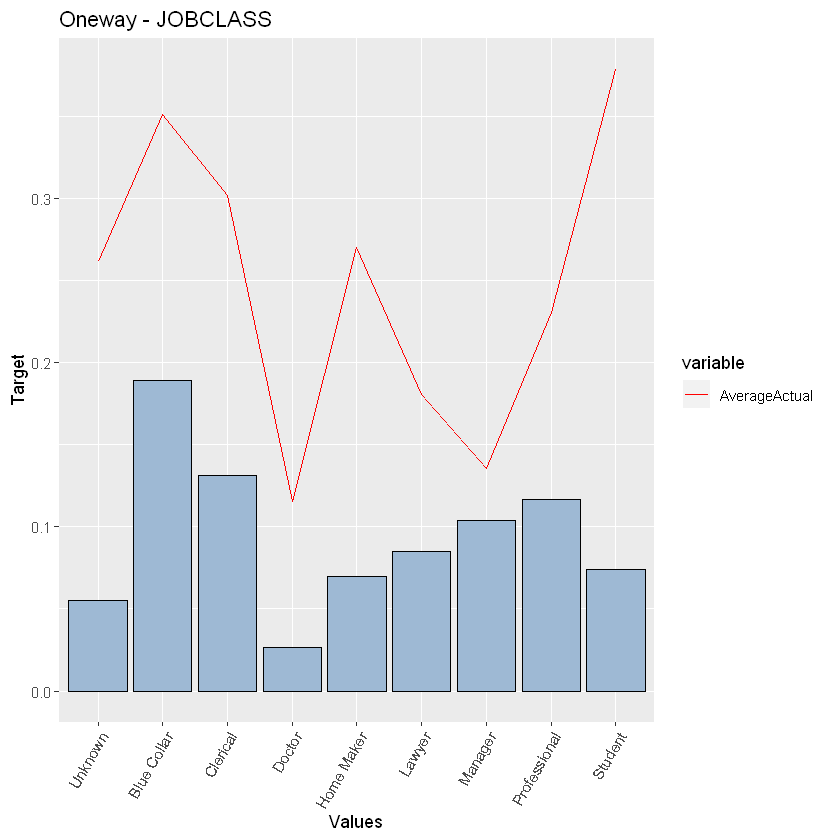

[[1]]
[[1]]$dframe
      Factor SumWeight SumActual AverageActual
1    Private      6507      1431     0.2199170
2 Commercial      3789      1309     0.3454737

[[1]]$plot_table


[[2]]
[[2]]$dframe
       Factor SumWeight SumActual AverageActual
5 Panel Truck       853       225     0.2637749
6      Pickup      1772       555     0.3132054
1       Sedan      2693       464     0.1722986
4  Sports Car      1176       405     0.3443878
3         SUV      2881       840     0.2915654
2         Van       921       251     0.2725299

[[2]]$plot_table


[[3]]
[[3]]$dframe
  Factor SumWeight SumActual AverageActual
1     No      9036      2172     0.2403718
2    Yes      1260       568     0.4507937

[[3]]$plot_table


[[4]]
[[4]]$dframe
  Factor SumWeight SumActual AverageActual
2      F      5540      1524     0.2750903
1      M      4756      1216     0.2556770

[[4]]$plot_table


[[5]]
[[5]]$dframe
  Factor SumWeight SumActual AverageActual
1     No      4109      1381     0.3360915
2   

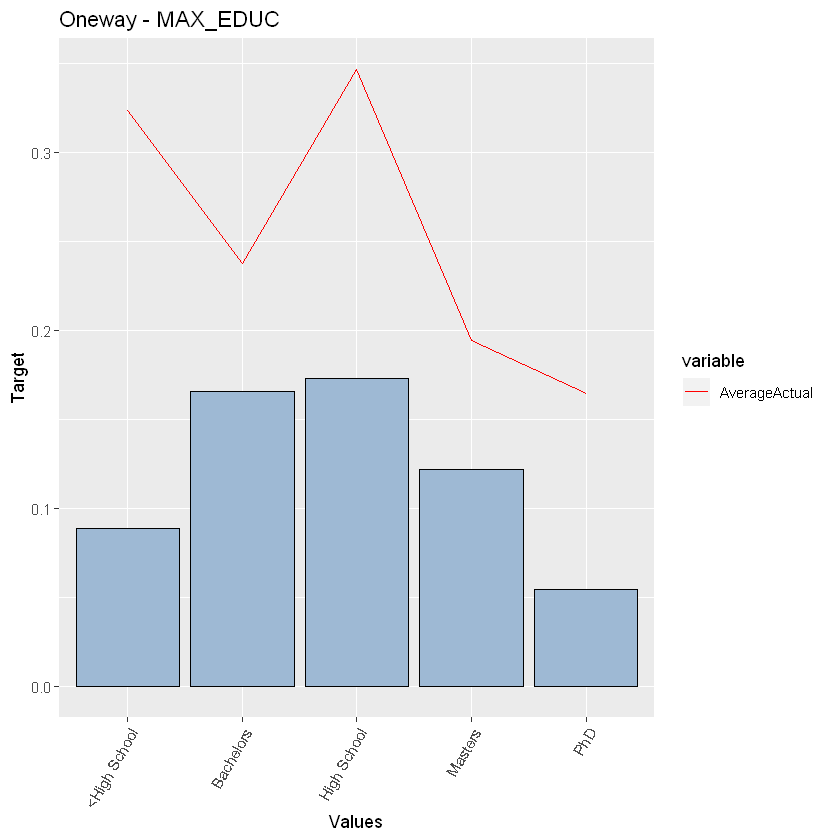

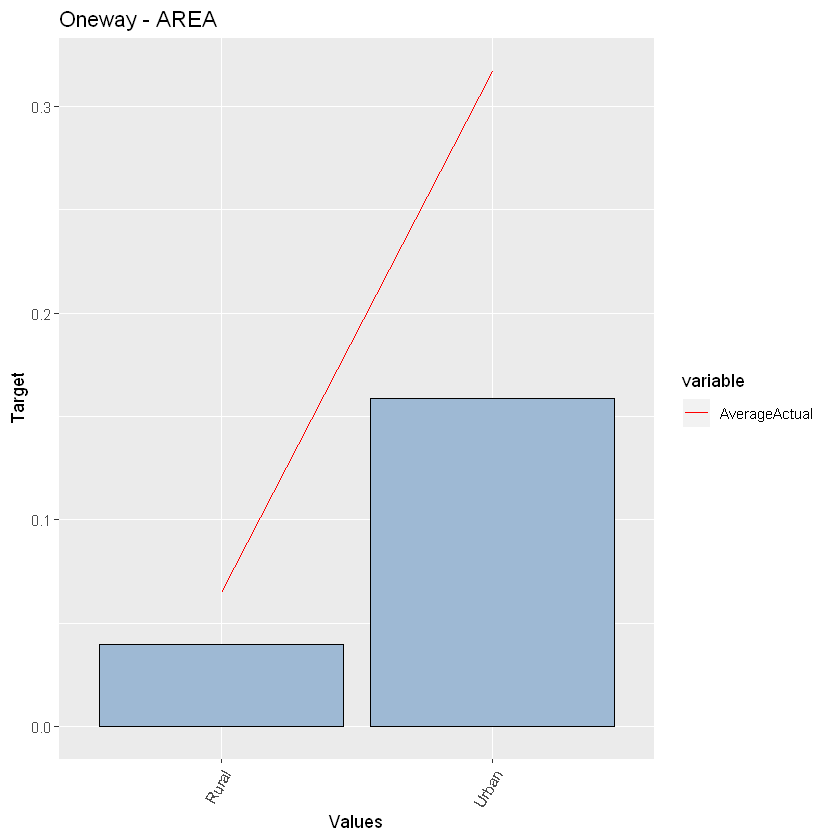

In [40]:
categoricals <- c('CAR_USE', 'CAR_TYPE', 'REVOLKED', 'GENDER', 'MARRIED', 'PARENT1', 'JOBCLASS', 'MAX_EDUC', 'AREA')
lapply(X = categoricals, FUN = function(x) {oneway_plot(dataset = AutoClaim, x = x, y = 'CLM_FLAG_NUM')})

**Run the rest of the variables**

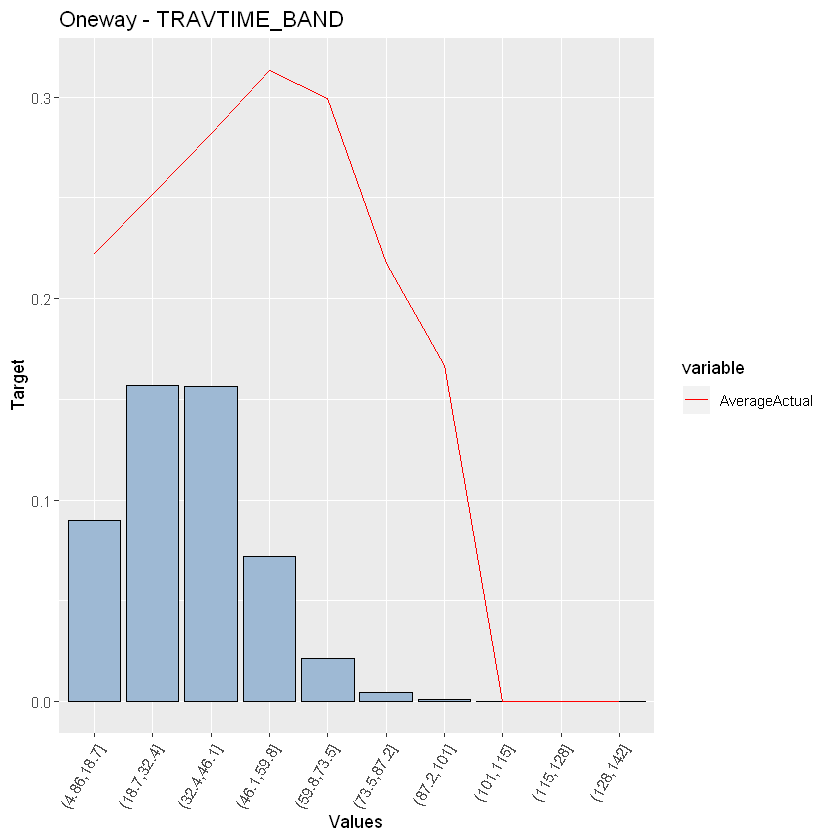

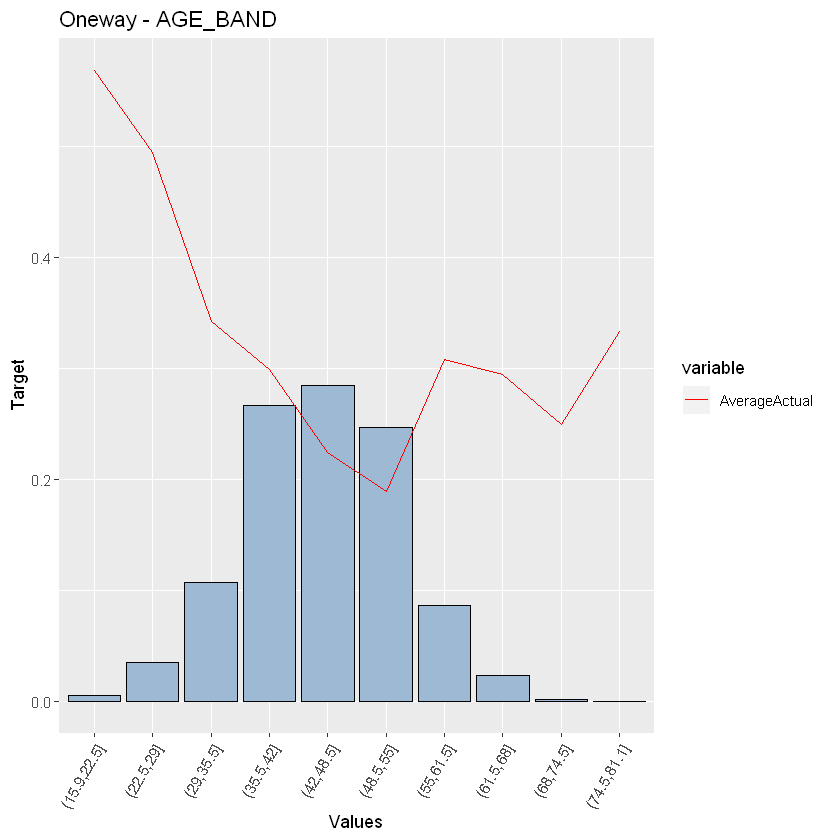

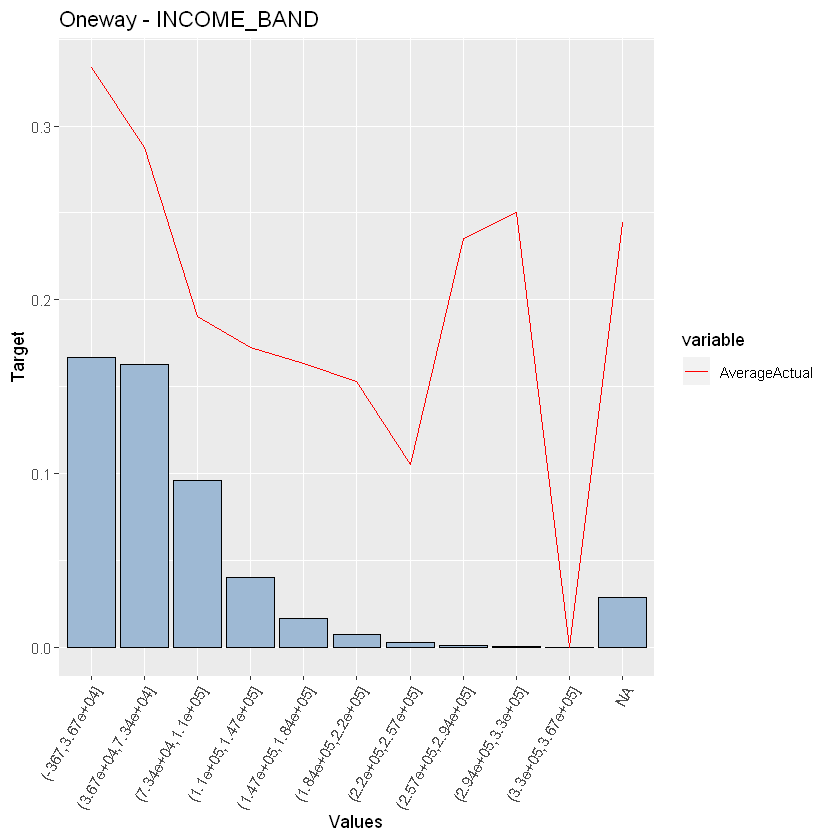

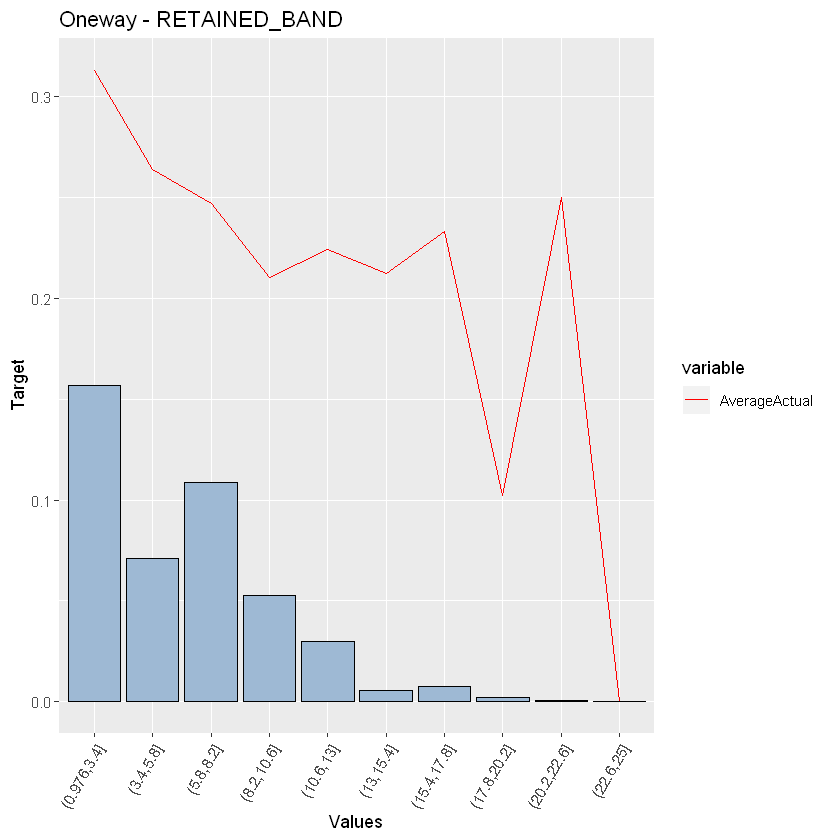

[[1]]
[[1]]$dframe
        Factor SumWeight SumActual AverageActual
1  (4.86,18.7]      1843       410     0.2224634
2  (18.7,32.4]      3212       808     0.2515567
3  (32.4,46.1]      3206       904     0.2819713
4  (46.1,59.8]      1474       462     0.3134328
5  (59.8,73.5]       444       133     0.2995495
6  (73.5,87.2]        92        20     0.2173913
7   (87.2,101]        18         3     0.1666667
8    (101,115]         4         0     0.0000000
9    (115,128]         1         0     0.0000000
10   (128,142]         2         0     0.0000000

[[1]]$plot_table


[[2]]
[[2]]$dframe
        Factor SumWeight SumActual AverageActual
9  (15.9,22.5]        51        29     0.5686275
6    (22.5,29]       346       171     0.4942197
3    (29,35.5]      1047       358     0.3419293
5    (35.5,42]      2593       775     0.2988816
2    (42,48.5]      2763       619     0.2240318
4    (48.5,55]      2399       454     0.1892455
1    (55,61.5]       843       260     0.3084223
7    (61.5,

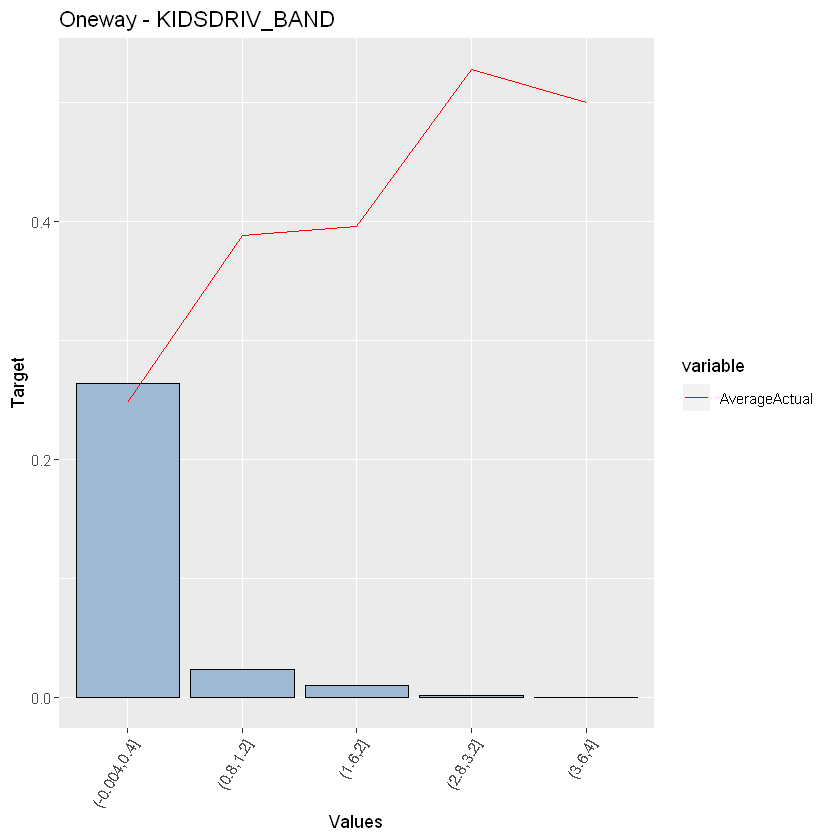

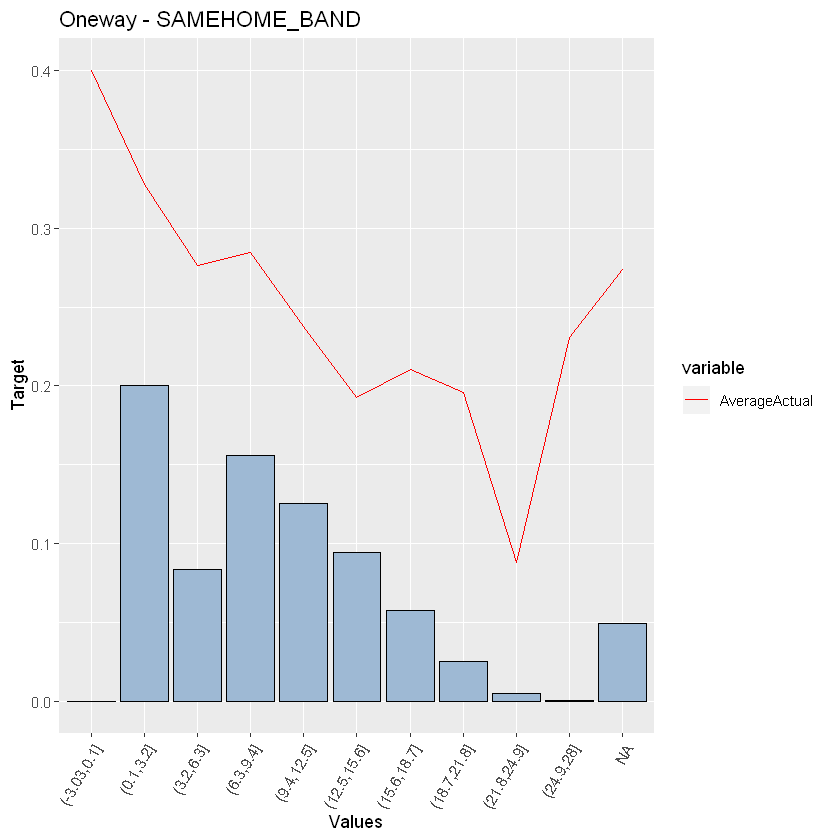

In [41]:
vars_to_band <- c("TRAVTIME","AGE","INCOME","RETAINED", "KIDSDRIV","SAMEHOME")
for (vble in vars_to_band)
{
  newvar <- paste(vble,"BAND", sep = "_")
  AutoClaim[,newvar] <-cut(x = AutoClaim[,vble],     breaks = 10,     ordered_result = TRUE)
  }

banded_vars <- c("TRAVTIME_BAND", "AGE_BAND","INCOME_BAND","RETAINED_BAND", "KIDSDRIV_BAND","SAMEHOME_BAND")
lapply(X = banded_vars, FUN = function(x) {oneway_plot(dataset = AutoClaim, x = x, y = 'CLM_FLAG_NUM')})

# FIT 2 GLMs #

In [43]:
glm.freq <- glm(formula = CLM_FLAG_NUM ~ AGE + GENDER + MARRIED + JOBCLASS + MAX_EDUC + BLUEBOOK,
                 data = AutoClaim,
                 family = poisson(link='log')) #xxx = poisson or binomial, yyy = log or logit. If binomial is used, an additional specification, weights=1 is needed

glm.sev <- glm(formula = CLM_AMT5 ~ AGE + GENDER + MARRIED + CAR_USE + BLUEBOOK + CAR_TYPE + AREA,
               # Keeping only observations with positive claim amounts
                 data = AutoClaim[which(AutoClaim$CLM_AMT5 > 0), ],
                 family = Gamma(link='log')) #zzz = Gamma or inverse.gaussian

In [44]:
summary(glm.freq)


Call:
glm(formula = CLM_FLAG_NUM ~ AGE + GENDER + MARRIED + JOBCLASS + 
    MAX_EDUC + BLUEBOOK, family = poisson(link = "log"), data = AutoClaim)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1488  -0.7477  -0.6100   0.5992   1.9055  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.868e-01  1.694e-01  -1.103 0.270200    
AGE                  -8.524e-03  2.326e-03  -3.664 0.000248 ***
GENDERM              -6.748e-02  4.033e-02  -1.673 0.094265 .  
MARRIEDYes           -4.273e-01  3.845e-02 -11.113  < 2e-16 ***
JOBCLASSBlue Collar  -3.446e-02  1.272e-01  -0.271 0.786416    
JOBCLASSClerical     -2.491e-01  1.325e-01  -1.881 0.060038 .  
JOBCLASSDoctor       -8.622e-01  1.962e-01  -4.395 1.11e-05 ***
JOBCLASSHome Maker   -3.213e-01  1.324e-01  -2.427 0.015245 *  
JOBCLASSLawyer       -4.673e-01  1.114e-01  -4.196 2.72e-05 ***
JOBCLASSManager      -7.963e-01  1.224e-01  -6.508 7.61e-11 ***
JOBCLASSProfessiona

In [ ]:
exp(coef(glm.freq))
exp(confint.default(glm.freq))


**Examine a Reduced Model**

In [46]:
glm.freq2 <- glm(formula = CLM_FLAG_NUM ~ AGE + GENDER + MARRIED + JOBCLASS + BLUEBOOK,
                 data = AutoClaim,
                 family = poisson(link='log')) #insert your earlier specifications

# anova(object, ..., dispersion = NULL, test = NULL)
  # test - "Chisq", "LRT", "Rao", "F" or "Cp"
anova(glm.freq, glm.freq2, test = "LRT")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
10279,6768.593,NA,NA,NA
10283,6792.146,-4,-23.55248,9.818521e-05


**USE AIC**

In [47]:
AIC(glm.freq, glm.freq2)
drop1(glm.freq) #AIC is the default

,df,AIC
glm.freq,17,12282.59
glm.freq2,13,12298.15


,Df,Deviance,AIC
<none>,NA,6768.593,12282.59
AGE,1,6782.026,12294.03
GENDER,1,6771.397,12283.40
MARRIED,1,6891.330,12403.33
JOBCLASS,8,6885.723,12383.72
MAX_EDUC,4,6792.146,12298.15
BLUEBOOK,1,6798.994,12310.99


# RESIDUAL PLOTS #

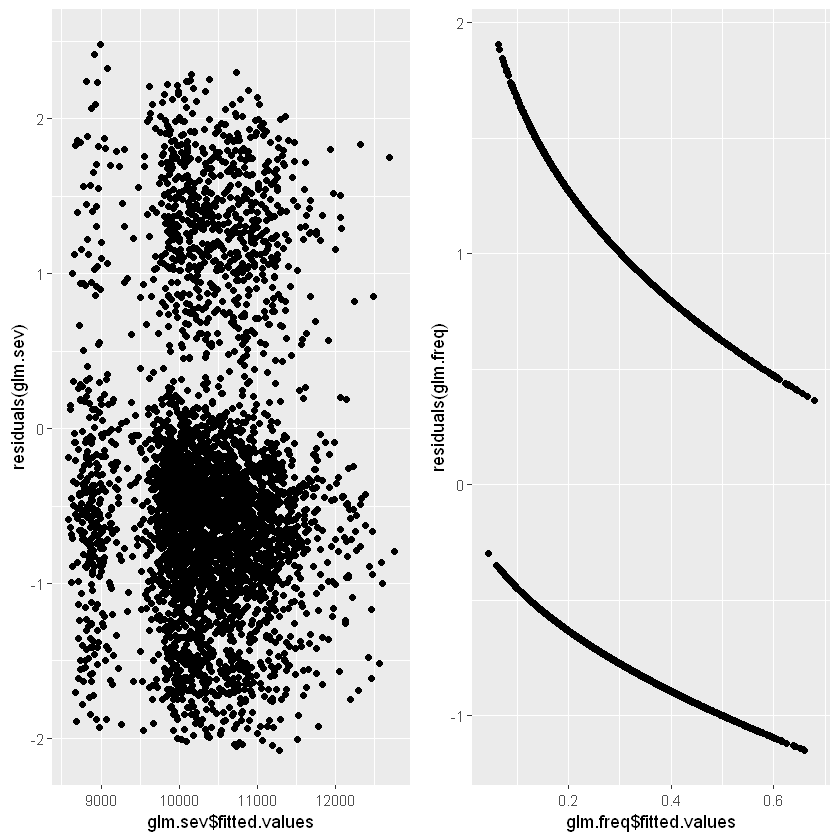

In [48]:
p1 <- qplot(x = glm.sev$fitted.values, y = residuals(glm.sev))
p2 <- qplot(x = glm.freq$fitted.values, y = residuals(glm.freq))
grid.arrange(p1, p2, ncol = 2)

# CRUNCH RESIDUALS #

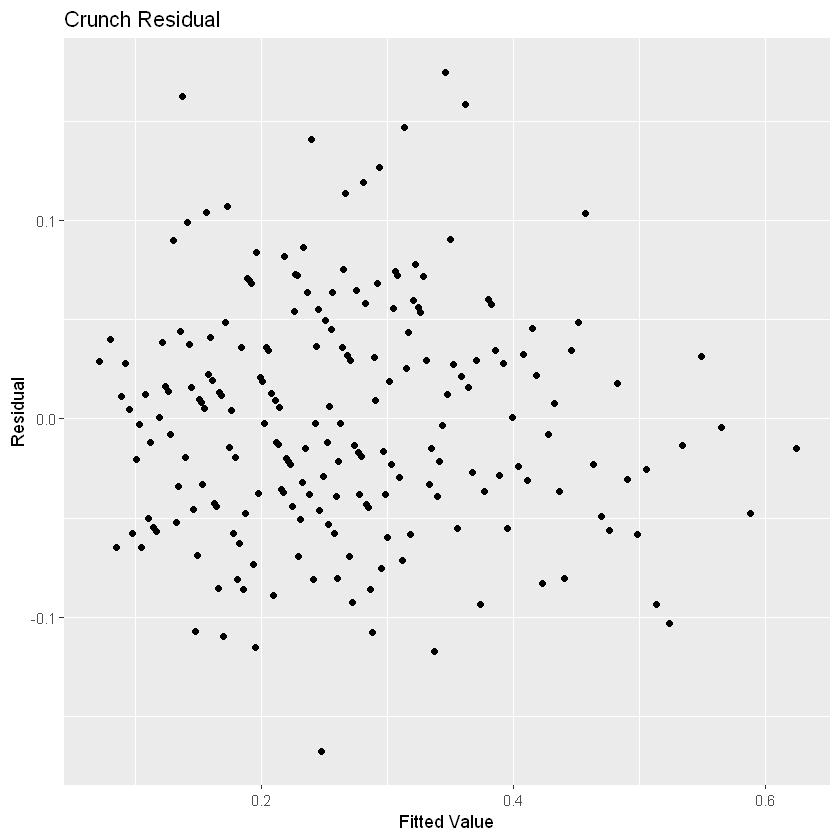

In [49]:
crunch_residual <- function(dataset, model, target, size = 50) {
  x  <- dataset[, target]
  x1 <- model$fitted.values
  y <- as.data.frame(cbind(x, x1))
  
  y <- y[order(x1), ]
  test <- setDT(y)[, as.list(colMeans(.SD)), by = gl(ceiling(nrow(y)/size), size, nrow(y))]
  test$res <- test$x - test$x1

  qplot(y = test$res, x = test$x1, ylab = "Residual", xlab = "Fitted Value", main = "Crunch Residual")
}

crunch_residual(dataset = AutoClaim, 
                model = glm.freq,
                target = 'CLM_FLAG_NUM', 
                size = 50)


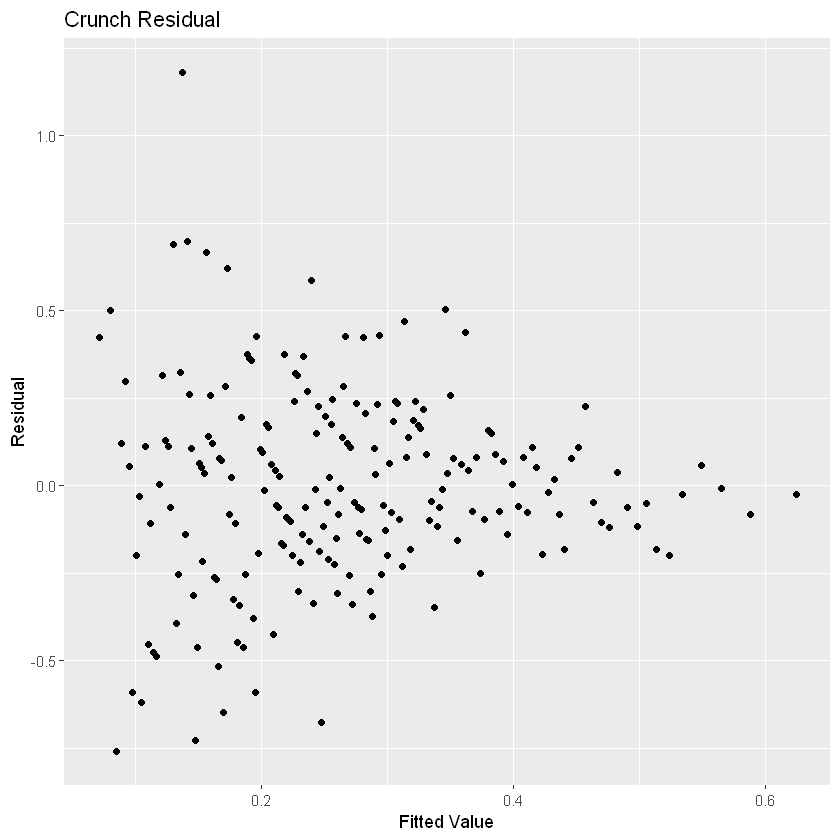

In [50]:
# Deviance
crunch_residual2 <- function(dataset, model, target, size = 50) {
  r  <- model$residuals
  x1 <- model$fitted.values
  y <- as.data.frame(cbind(r, x1))
  
  y <- y[order(x1), ]
  test <- setDT(y)[, as.list(colMeans(.SD)), by = gl(ceiling(nrow(y)/size), size, nrow(y))]

  qplot(y = test$r, x = test$x1, ylab = "Residual", xlab = "Fitted Value", main = "Crunch Residual")
}

crunch_residual2(dataset = AutoClaim, 
                model = glm.freq,
                target = 'CLM_FLAG_NUM', 
                size = 50)


# ADDITIONAL DIAGNOSTIC PLOTS #

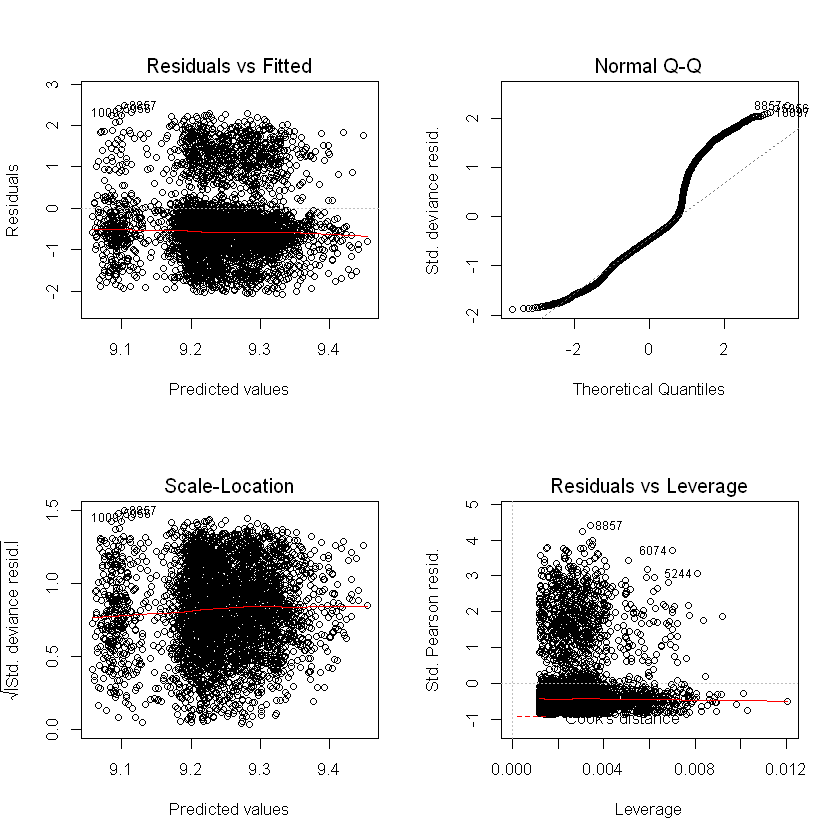

In [51]:
par(mfrow = c(2, 2))
plot(glm.sev)

# INTERACTIONS #

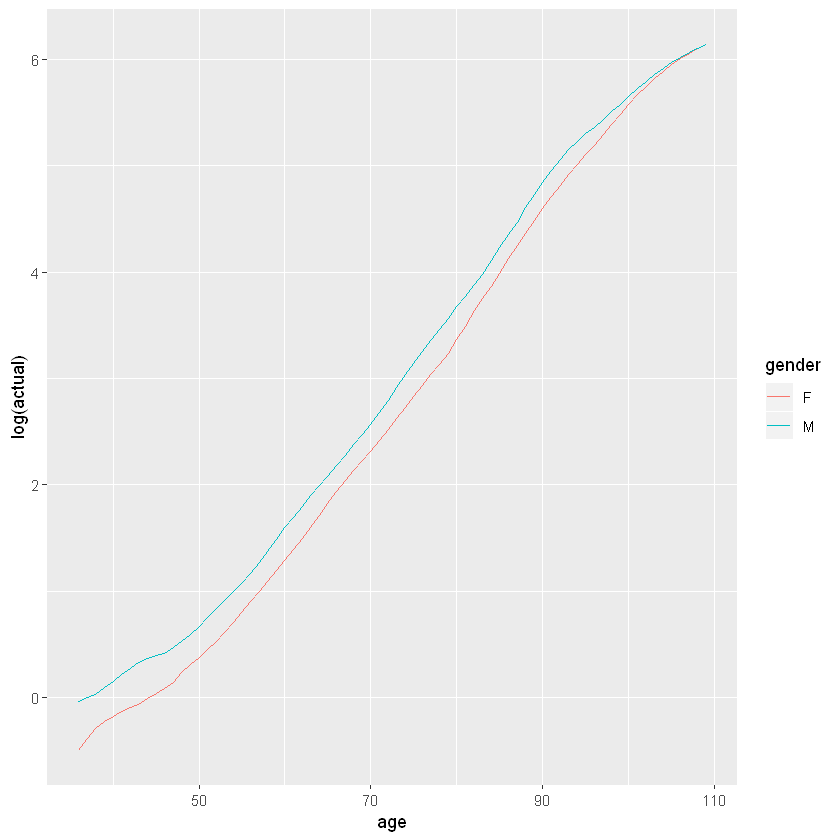

In [53]:
intDatf <- read.csv(file = "interactionData.csv")

# If we plot the log of the  response variable (actual), we can see that relationship between
#   age and the response is different for males and females
ggplot(intDatf, aes(x = age, y = log(actual), color = gender)) + geom_line()

**Linear Model without Interaction**


Call:
glm(formula = "actual ~ gender + age", family = Gamma(link = "log"), 
    data = intDatf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3380  -0.1612  -0.0518   0.1447   0.5523  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.2686031  0.0569938 -74.896  < 2e-16 ***
genderM      0.2468145  0.0309999   7.962  4.5e-13 ***
age          0.0965312  0.0007257 133.027  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.0355568)

    Null deviance: 483.0530  on 147  degrees of freedom
Residual deviance:   4.8195  on 145  degrees of freedom
AIC: 761.74

Number of Fisher Scoring iterations: 5


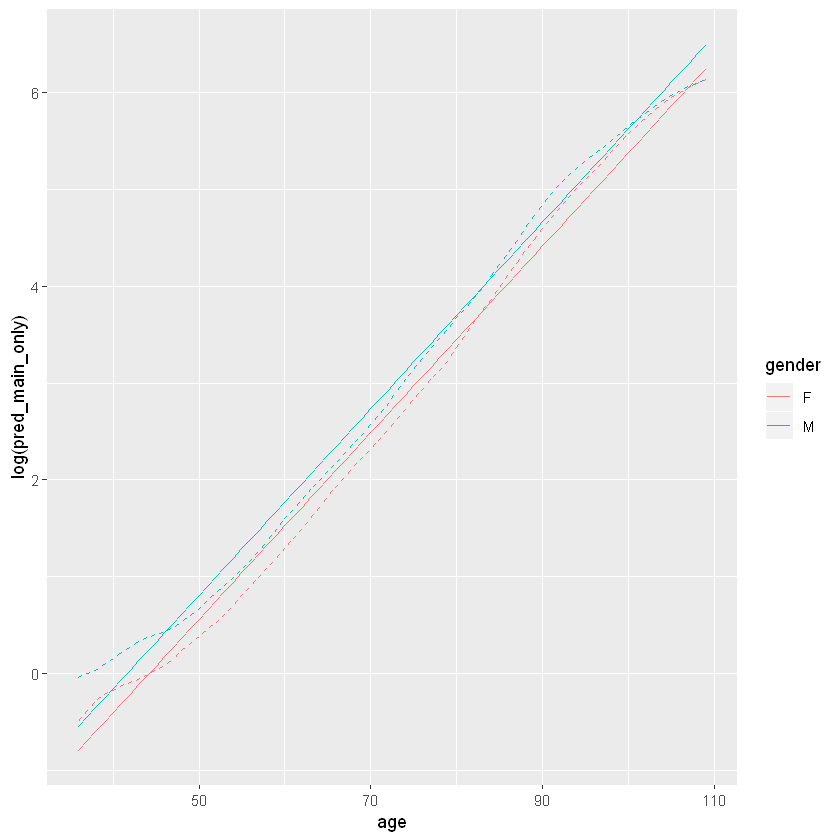

In [54]:
glm.main.only <- glm('actual ~ gender + age', intDatf, family = Gamma(link = 'log'))

# The parameter estimates are significant (no surprise)
summary(glm.main.only)

# First, we add the predctions to the data
intDatf$pred_main_only <- predict(glm.main.only, intDatf, type = 'response')

# Then we compare the predictions from our main effects only model to the actuals
# These lines are parallel because the influence of age (ie the slope) is independent
#   of gender.  Clearly, this differs from the actual relationships.
ggplot(intDatf) +
    geom_line(aes(x = age, y = log(pred_main_only), color = gender)) +
    geom_line(linetype = 2, aes(x = age, y = log(actual), color = gender))


**Model WITH Interaction**


Call:
glm(formula = "actual ~ gender*age", family = Gamma(link = "log"), 
    data = intDatf)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.27102  -0.16417  -0.04363   0.13317   0.46725  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.4119237  0.0753295 -58.568  < 2e-16 ***
genderM      0.5347467  0.1065319   5.020 1.51e-06 ***
age          0.0984947  0.0009967  98.824  < 2e-16 ***
genderM:age -0.0039717  0.0014095  -2.818  0.00551 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.03353807)

    Null deviance: 483.0530  on 147  degrees of freedom
Residual deviance:   4.5312  on 144  degrees of freedom
AIC: 754.56

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,147,483.052956
gender,1,0.3842809,146,482.668675
age,1,477.8492135,145,4.819461
gender:age,1,0.2882453,144,4.531216


[1] -7.175464

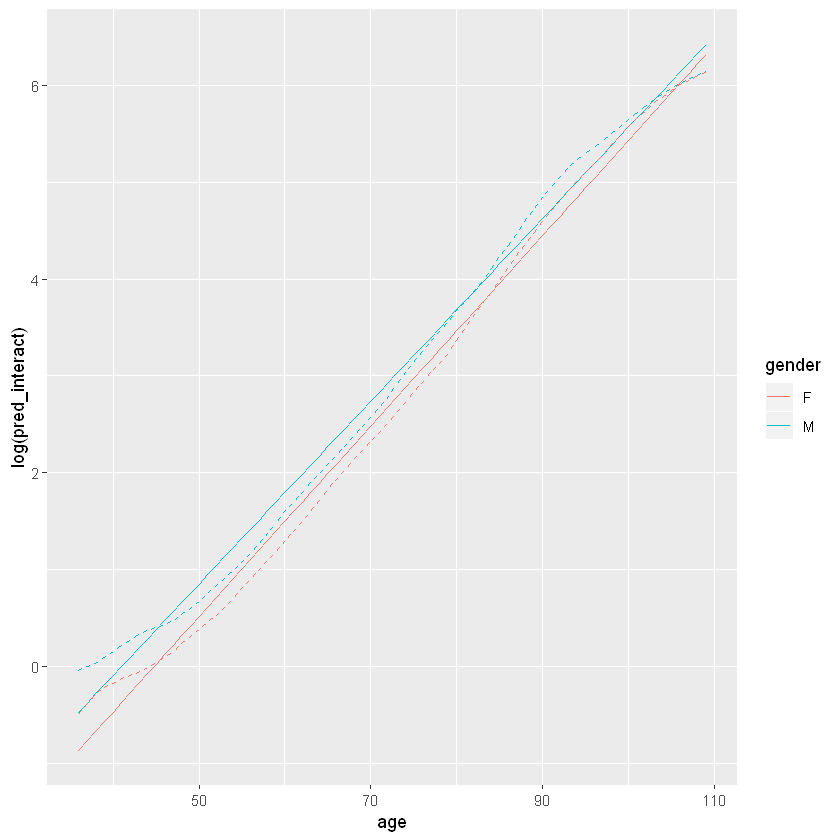

In [55]:
#Note than when specifiying the interaction term gender*age, the model automatically includes gender and age as main effects
glm.interact <- glm('actual ~ gender*age', intDatf, family = Gamma(link = 'log'))

summary(glm.interact)

# Furthermore, we can test the significance of our interaction using an analysis of deviance
anova(glm.interact)

# Or calculate the change in AIC between the two models (with and without the interaction)
AIC(glm.interact) - AIC(glm.main.only)

# Now we can see the slope adjustment introduced by the interaction term
intDatf$pred_interact <- predict(glm.interact, intDatf, type = 'response')

ggplot(intDatf) +
    geom_line(aes(x = age, y = log(pred_interact), color = gender)) +
    geom_line(linetype = 2, aes(x = age, y = log(actual), color = gender))


**PREPARE A LIFT CHART**

$dframe
       Factor SumWeight SumActual   SumFit AverageActual AverageFit
5 Panel Truck       853       225 180.0802     0.2637749  0.2111140
6      Pickup      1772       555 506.5570     0.3132054  0.2858674
1       Sedan      2693       464 673.9073     0.1722986  0.2502441
4  Sports Car      1176       405 335.8723     0.3443878  0.2856057
3         SUV      2881       840 829.7146     0.2915654  0.2879954
2         Van       921       251 213.8686     0.2725299  0.2322135

$plot


$dframe
   Factor SumWeight SumActual      SumFit AverageActual AverageFit
55     16         5         3   2.2644021     0.6000000  0.4528804
54     17         2         1   1.0157382     0.5000000  0.5078691
60     18         3         2   1.1618971     0.6666667  0.3872990
45     19         8         5   3.0773435     0.6250000  0.3846679
43     20         4         2   1.9534563     0.5000000  0.4883641
44     21        12         4   5.5309178     0.3333333  0.4609098
50     22        17        12   7.4915457     0.7058824  0.4406792
51     23        12         7   4.5361349     0.5833333  0.3780112
48     24        25        19  10.0382988     0.7600000  0.4015320
41     25        32        23  11.9911450     0.7187500  0.3747233
37     26        46        30  16.7466150     0.6521739  0.3640568
42     27        65        35  25.2329685     0.5384615  0.3881995
19     28        76        31  27.7378848     0.4078947  0.3649722
33     29        90        26  32.7769372     0.288888

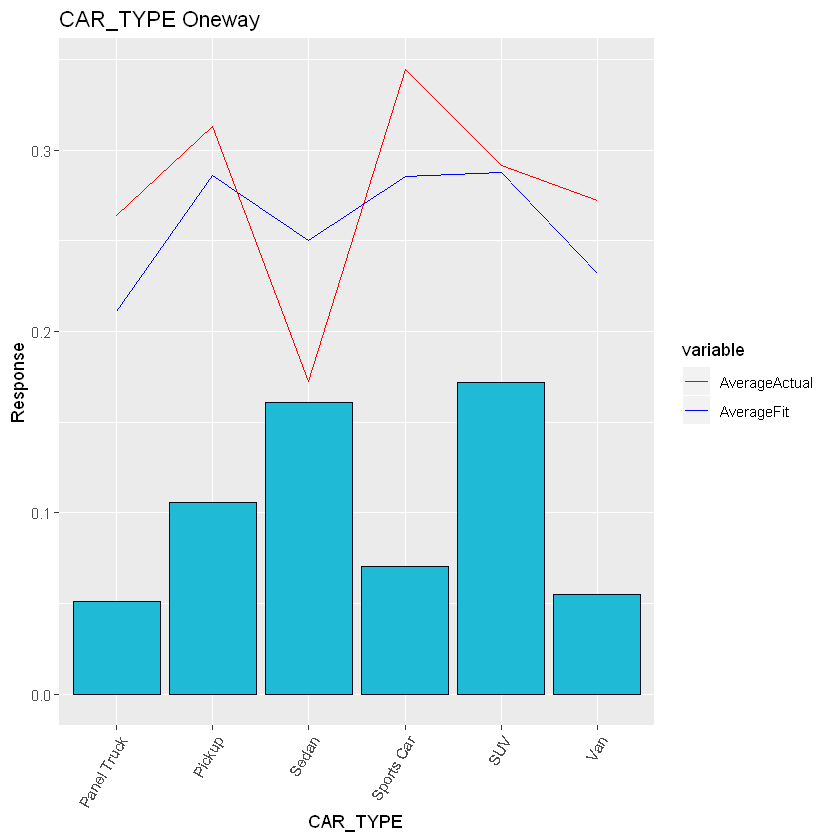

$dframe
  Factor SumWeight SumActual SumFit AverageActual AverageFit
2      F      5540      1524   1524     0.2750903  0.2750903
1      M      4756      1216   1216     0.2556770  0.2556770

$plot


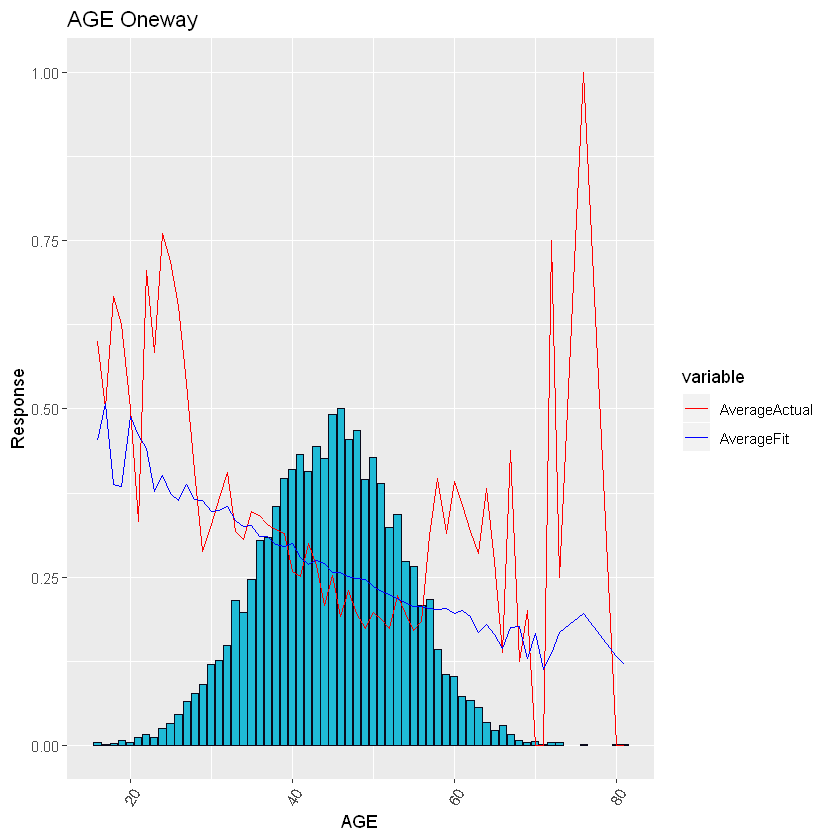

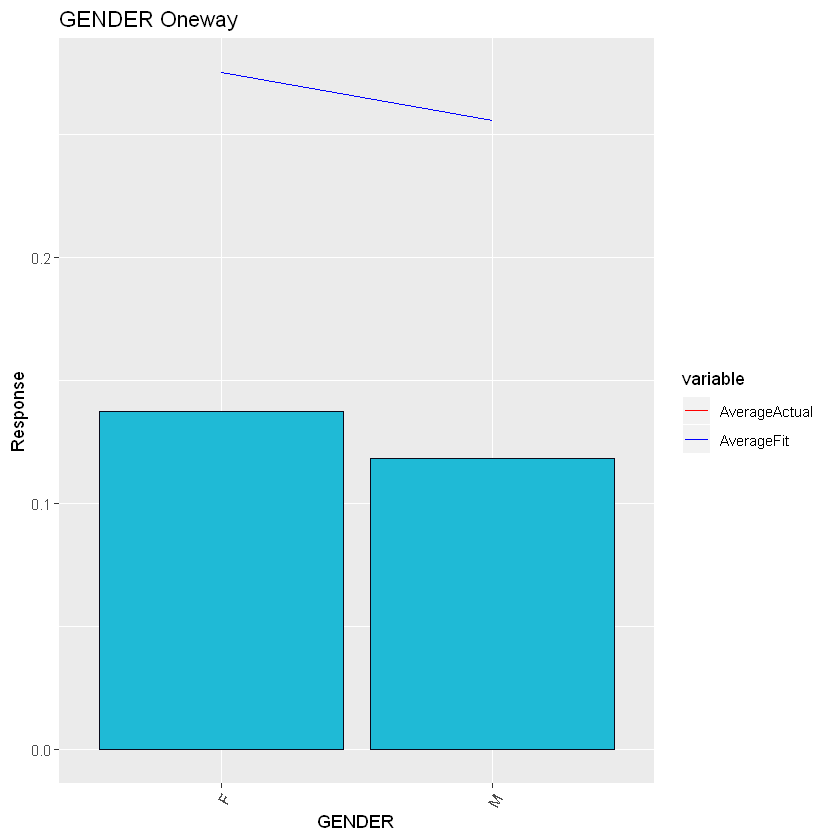

In [56]:
plot.fit.oneway <- function(df, var, exposure, response, fit) 
{
  modeldata <- data.frame(Weight = df[[exposure]],
                          Actual = df[[response]],
                          Fit = df[[fit]],
                          Factor = df[[var]])
  
  dframe <- as.data.frame(data.table(modeldata)[,.(SumWeight = sum(Weight)
                                                   ,SumActual = sum(Actual)
                                                   ,SumFit  = sum(Fit)
                                                   ,AverageActual = sum(Actual)/sum(Weight)
                                                   ,AverageFit = sum(Fit)/sum(Weight))
                                                ,by = Factor])
  
  dframe <- dframe[order(dframe$Factor), ]
  dframe.melt <- melt(dframe [, c(1, 5, 6)], id = c("Factor"))
  weight_max <<- max(dframe$SumWeight)
  resp_max <<- max(dframe.melt$value)
  
  plot2 <- ggplot(dframe, aes(x = Factor, y = SumWeight, group=1)) +
    geom_bar(stat = "identity", aes(x = Factor, y = SumWeight*0.5*(resp_max)/(weight_max)), col = "#09091A", fill = "#1FBAD6") +
    geom_line(data = dframe.melt, aes(x = Factor, y = value, colour = variable, group = variable)) +
    scale_colour_manual(values = c("red", "blue", "black")) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
    labs(title = paste(var,"Oneway"), x = var,  y = "Response") 
  #+ geom_text(data=dframe.melt, aes(x=Factor, y = value, label = round(value, digits = 3), vjust = 9))
  
  return(list(dframe=dframe,plot=plot2))
}

AutoClaim$YHAT <- glm.freq$fitted.values
AutoClaim$expo <- rep(1, nrow(AutoClaim))


# Example
plot.fit.oneway(AutoClaim, 'CAR_TYPE', 'expo', 'CLM_FLAG_NUM', 'YHAT')
plot.fit.oneway(AutoClaim, 'AGE', 'expo', 'CLM_FLAG_NUM', 'YHAT')
plot.fit.oneway(AutoClaim, 'GENDER', 'expo', 'CLM_FLAG_NUM', 'YHAT')


**Make a 2 Way Plot**

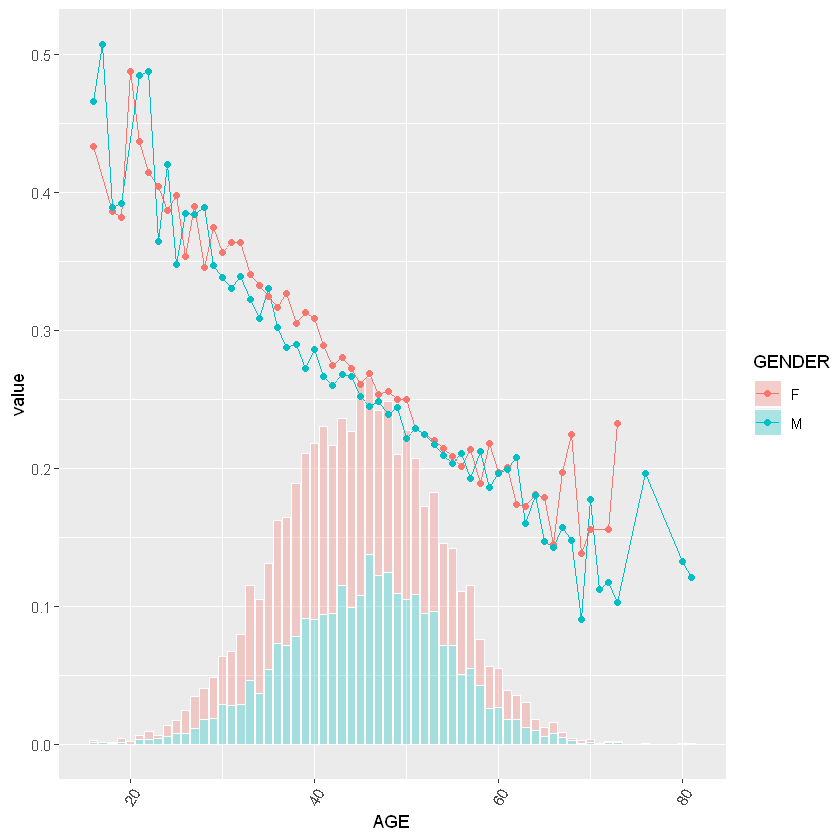

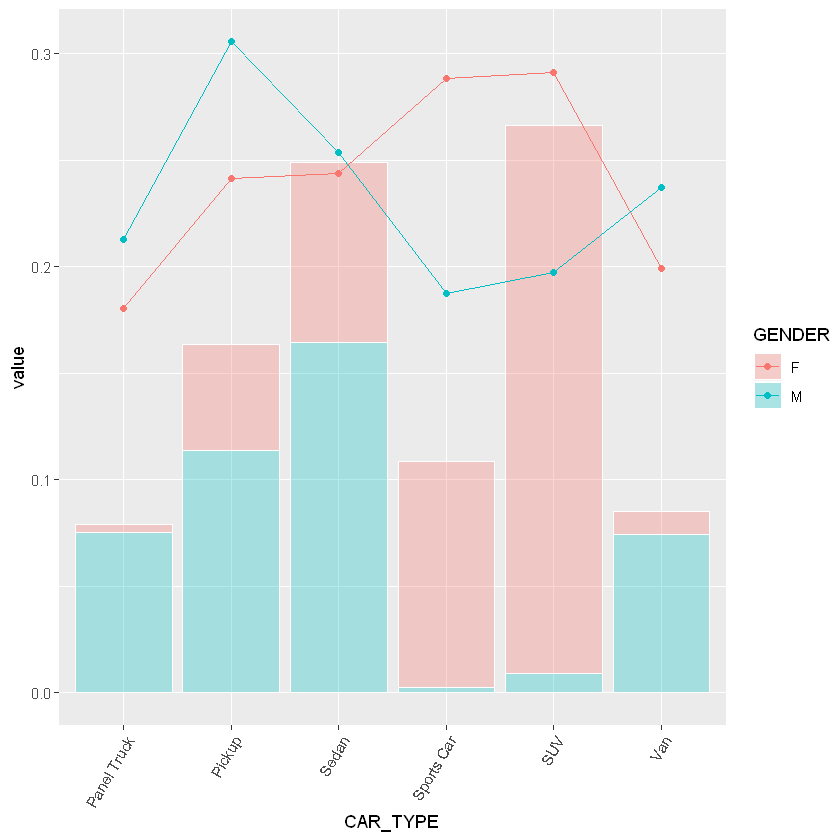

In [57]:
plot.fit.twoway <- function(df,response, exposure = NULL, var1, var2){
  #### Plots a two-way response/exposure chart, allowing only a single response - it is straightforward to add the second response if required (i.e. to compare actual vs fitted on a single graph)
  #### Requires:
  #### - df - a data frame
  #### - response - name of numeric column in df to plot
  #### - exposure - name of numeric column in df to use as exposure
  #### - var1 - name of factor column in df for x-axis
  #### - var2 - name of factor column in df, shown as multiple lines/bars - note this must be a factor (banding must be completed prior to using in function)
  #### Plots line/bar chart by factor1 x factor2:
  #### - Lines: sum(df[,response])/sum(df[,exposure])
  #### - Bars: sum(df[,exposure])
  
  
  ## If exposure not given, do count
  if (is.null(exposure)){
    exposure <- "Count"
    df$Count <- 1
  }
  
  ## Crunch data
  df$wt <- df[,exposure]
  df$value <- df[,response]
  df.crunch <- as.data.frame(data.table(df)[,.(value=sum(value),
                                               wt=sum(wt))
                                            ,by = c(var1,var2)])
  
  ## Crunch weight 1-way
  df.crunch.1way <- as.data.frame(data.table(df)[,.(wt=sum(wt))
                                                 ,by = c(var1)])
  
  ## Average response
  resp.avg <- sum(df.crunch$value)/sum(df.crunch$wt)
  
  ## Convert value to average
  df.crunch$value <- df.crunch$value/df.crunch$wt
  
  ## Rescale weight so that max == line.avg
  df.crunch$wt_rescaled <- df.crunch$wt * resp.avg / max(df.crunch.1way$wt)
  
  df.crunch <- df.crunch[order(df.crunch[,var1],df.crunch[,var2]),]
  
  
  ## Plot a chart
  plot.twoway <- ggplot(df.crunch)+
    geom_bar(stat="identity", aes_string(x=var1,y="wt_rescaled",fill=var2,group=var2),col="white",alpha=0.3)+
    geom_line(aes_string(x=var1,y="value",colour=var2,group=var2))+
    geom_point(aes_string(x=var1,y="value",colour=var2,group=var2))+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))+
    labs(y = "value" )
  
  return(plot.twoway)
}

plot.fit.twoway(df = AutoClaim, var1 = 'AGE', var2 = 'GENDER', exposure = 'expo', response = 'YHAT')
plot.fit.twoway(df = AutoClaim, var1 = 'CAR_TYPE', var2 = 'GENDER', exposure = 'expo', response = 'YHAT')


**Set up splines for the age variable**

In [58]:
library(splines)

# Read the documentation for more information on the different types of splines and how these functions work: https://www.rdocumentation.org/packages/splines/versions/3.3.3


# B-Spline with knots at age=25,30,55
AGE.bs <- bs(AutoClaim$AGE, knots = c(25, 30, 55))

# Natural Cubic Spline with default selection of knots (corresponding to 3 degrees of freedom)
AGE.ns <- ns(AutoClaim$AGE, df=3)


**Original frequency model with AGE.ns instead of AGE**

$dframe
   Factor SumWeight SumActual      SumFit AverageActual AverageFit
55     16         5         3   3.8257890     0.6000000  0.7651578
54     17         2         1   1.6570128     0.5000000  0.8285064
60     18         3         2   1.8265751     0.6666667  0.6088584
45     19         8         5   4.7038387     0.6250000  0.5879798
43     20         4         2   2.9318745     0.5000000  0.7329686
44     21        12         4   7.9459154     0.3333333  0.6621596
50     22        17        12  10.6804676     0.7058824  0.6282628
51     23        12         7   6.2818781     0.5833333  0.5234898
48     24        25        19  13.5336823     0.7600000  0.5413473
41     25        32        23  15.7663227     0.7187500  0.4926976
37     26        46        30  21.4474783     0.6521739  0.4662495
42     27        65        35  31.6583479     0.5384615  0.4870515
19     28        76        31  33.8175509     0.4078947  0.4449678
33     29        90        26  38.9849645     0.288888

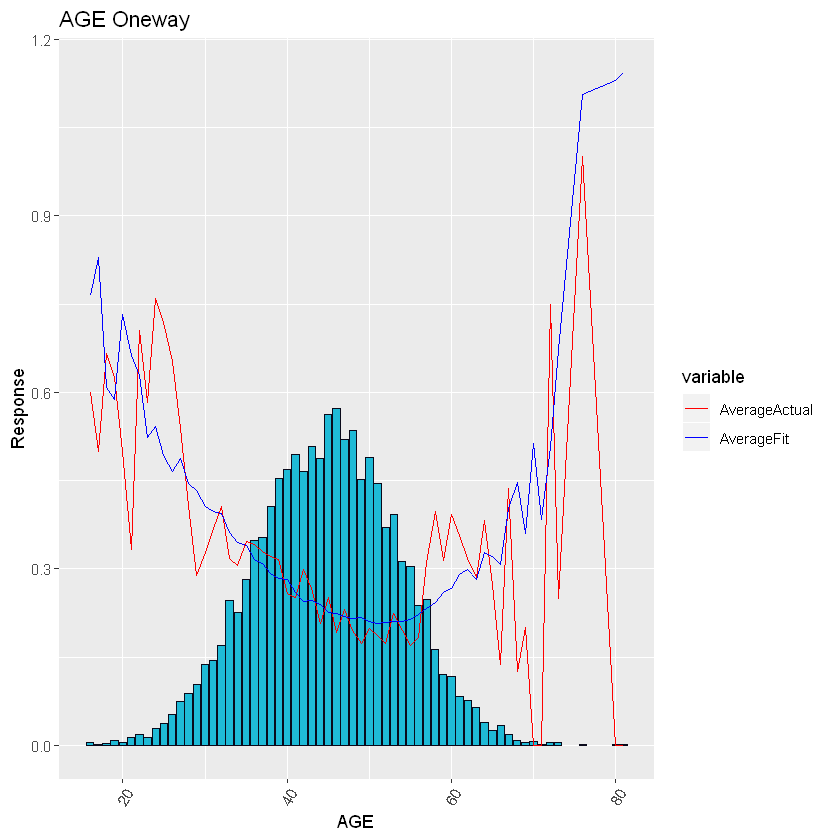

In [59]:
glm.freq3 <- glm(formula = CLM_FLAG_NUM ~ AGE.ns + GENDER + MARRIED + JOBCLASS + MAX_EDUC + BLUEBOOK,
                 data = AutoClaim,
                 family = poisson(link='log'))

AutoClaim$YHAT <- glm.freq3$fitted.values
plot.fit.oneway(AutoClaim, 'AGE', 'expo', 'CLM_FLAG_NUM', 'YHAT')

**OVERALL LIFT CHART WITH EQUAL BIN SIZE**

        YHAT CLM_FLAG_NUM expo       YHAT_BAND
1 0.22774247            0    1   (0.226,0.228]
2 0.47510417            0    1   (0.469,0.483]
3 0.15128182            0    1   (0.151,0.154]
4 0.33471095            0    1   (0.333,0.337]
5 0.25382443            0    1   (0.253,0.256]
6 0.09465384            0    1 (0.0906,0.0969]


$dframe
             Factor SumWeight SumActual    SumFit AverageActual AverageFit
100 (0.0436,0.0828]       102        11  7.717244    0.10784314 0.07565926
37  (0.0828,0.0906]       103         6  8.957947    0.05825243 0.08697036
6   (0.0906,0.0969]       103        12  9.673860    0.11650485 0.09392097
15   (0.0969,0.102]       103         5 10.258933    0.04854369 0.09960129
59    (0.102,0.107]       103         7 10.747811    0.06796117 0.10434768
40    (0.107,0.112]       103        11 11.302036    0.10679612 0.10972850
36    (0.112,0.117]       103         7 11.755486    0.06796117 0.11413093
87    (0.117,0.121]       103        11 12.252730    0.10679612 0.11895854
49    (0.121,0.126]       103        16 12.740310    0.15533981 0.12369233
82     (0.126,0.13]       103        14 13.202956    0.13592233 0.12818404
44     (0.13,0.134]       103        13 13.645345    0.12621359 0.13247908
61    (0.134,0.138]       103        22 14.017992    0.21359223 0.13609701
74    (0.138,0.14

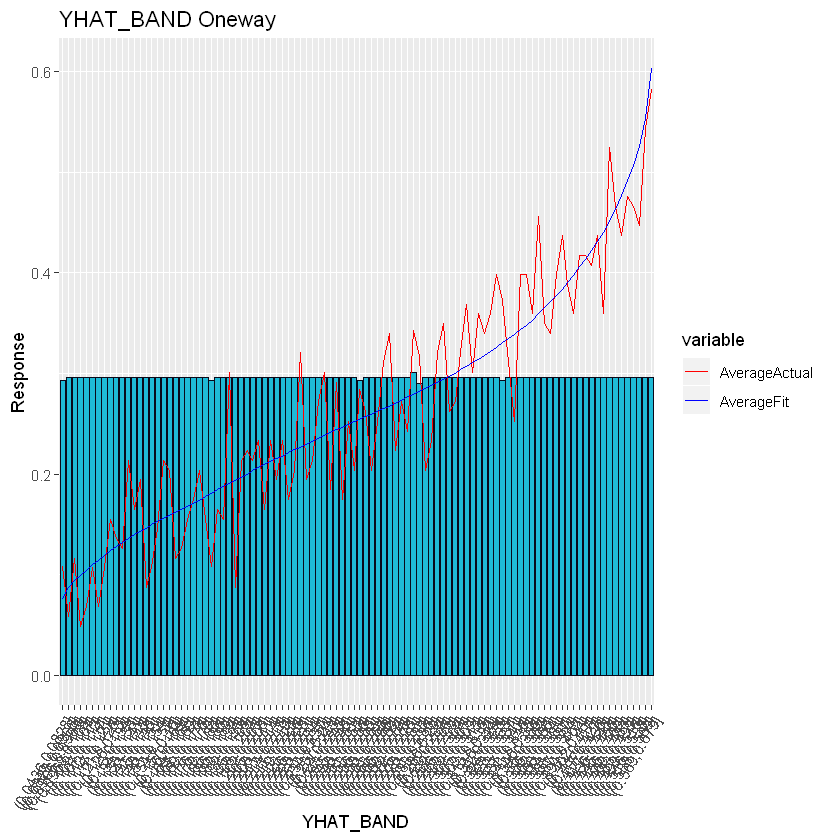

In [60]:
equalexposurecut <- function(nbins, weight, factor, miss=NA, sensitivity=1)
{
  if (!is.na(miss)){factor[factor==miss]=NA}
  sort <- order(factor)
  factor.sort <- factor[sort]
  weight.sort <- weight[sort]
  weight.cum <- cumsum(weight.sort)
  weight.sum <- max(weight.cum[!is.na(factor.sort)])
  weight.sumna <- max(weight.cum)
  weight.bands <- cut(weight.cum,c(seq(0,weight.sum,(weight.sum/nbins)),weight.sumna+sensitivity))
  levels(weight.bands)<-(1:length(levels(weight.bands)))
  fac_breaks <- vector(length = nbins + 1)
  fac_breaks[1] <- min(factor[!is.na(factor)])-sensitivity
  fac_labels <- vector(length = nbins + 1)
  for (i in 1:nbins){
    fac_breaks[i+1] <- max(max(factor.sort[weight.bands==i]),fac_breaks[i]+sensitivity)

  }
  factor_bin <- cut(factor, fac_breaks)
  levels(factor_bin)<-c(levels(factor_bin),"NA")
  factor_bin[is.na(factor_bin)]=levels(factor_bin)[length(levels(factor_bin))]
  return(factor_bin)
}


PlotLiftChart <- function(data, predicted, actual, weight, nbin) {
  plotdata <- data[,c(predicted,actual,weight)]
  plotdata[,paste0(predicted,"_BAND")] <- equalexposurecut(nbins = nbin, weight = plotdata[,weight], factor = plotdata[,predicted], sensitivity = 0.001)
  print(head(plotdata))
  plot.fit.oneway(df = plotdata, var = paste0(predicted,"_BAND"), exposure = weight, response = actual, fit = predicted)
}

# Note we are looking at glm.freq model here
AutoClaim$YHAT <- glm.freq$fitted.values

PlotLiftChart(data = AutoClaim, predicted = 'YHAT', actual = 'CLM_FLAG_NUM', weight = 'expo', nbin = 100)


**DOUBLE LIFT CHART**

In [61]:
PlotDoubleLiftChart <- function(data,Predicted1,Predicted2,Actual,Weight,banding = c(0,seq(0.75,1.25,0.05),10)) {
  # Compares predicted values of 2 models against each other and actual, plotted by model differences
  ## Inputs;
  #    - data: data frame including the predicted and weight fields
  #    - Predicted1/Predicted2/Actual/Weight: strings giving the names of the model prediction, observed and exposure fields.
  #    - banding: vector of cut points for banding the x-axis (Predicted1/Predicted2)
  modeldata <- data.frame(
    Weight = data[,Weight],
    Predicted1 = data[,Predicted1],
    Predicted2 = data[,Predicted2],
    Actual = data[,Actual],
    ModelDifference = cut(data[,Predicted1]/data[,Predicted2],banding))

  dframe <- as.data.frame(data.table(modeldata)[,
                                                 .(SumWeight = sum(Weight)
                                                  ,SumActual = sum(Actual)
                                                  ,SumFitted1 = sum(Predicted1)
                                                  ,SumFitted2 = sum(Predicted2)
                                                  ,AverageActual = sum(Actual)/sum(Weight)
                                                  ,Model1 = sum(Predicted1)/sum(Weight)
                                                  ,Model2 = sum(Predicted2)/sum(Weight))
                                                ,by = ModelDifference
                                                ])
  
  dframe <- dframe[order(dframe$Model1 ),];
  
  cols <- colnames(dframe)
  cols[6] <- Actual
  cols[7] <- Predicted1
  cols[8] <- Predicted2
  
  colnames(dframe) <- cols
  
  dframe.melt <- melt(dframe [,c(1,6,7,8)],id=c("ModelDifference"))
  weight_max <<- max(dframe$SumWeight)
  resp_max <<- max(dframe.melt$value)

  plot1<-ggplot(dframe , aes(x=ModelDifference,y=SumWeight,group=1))+
    geom_bar(stat="identity",aes(x=ModelDifference,y=SumWeight*0.3*(resp_max)/(weight_max)),col="black",fill="yellow")+
    geom_line(data=dframe.melt,aes(x=ModelDifference,y=value,colour=variable,group=variable))+
    scale_colour_manual(values=c("red","blue","black"))+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))+
    labs(title = paste("Double Lift Chart"), x = "Model Difference", y = "Fitted" )
  # used substitute(data) to put name in
  return(list(dframe=dframe,plot=plot1))
}

PlotDoubleLiftChart_EqExp <- function(data,Predicted1,Predicted2,Actual,Weight,bins = 50) {
  factor <- data[,Predicted1] / data[,Predicted2]
  Breaks <- equalexposurecut(bins,data[,Weight],factor,miss=NA,sensitivity=0.000001)
  PlotDoubleLiftChart(data,Predicted1,Predicted2,Actual,Weight,c(0,Breaks,1000000))
}


$dframe
   ModelDifference SumWeight SumActual SumFitted1 SumFitted2 CLM_FLAG_NUM
20      (1.2,1.23]        36         1   4.050232   3.362685   0.02777778
5       (1.18,1.2]       104        21  22.013151  18.618894   0.20192308
1         (0,0.75]       500       190 111.959225 183.456095   0.38000000
14     (1.15,1.18]       534       108 132.703715 114.466483   0.20224719
3      (1.12,1.15]      1947       405 484.227568 425.739660   0.20801233
9       (1.1,1.12]      1280       282 334.105022 300.201109   0.22031250
2       (1.07,1.1]       914       225 239.700389 220.362753   0.24617068
4     (0.95,0.975]       517       147 140.087119 145.470487   0.28433269
8      (1.05,1.07]       751       197 204.908425 192.663397   0.26231691
16        (1,1.02]       591       173 161.482542 159.564464   0.29272420
10     (1.02,1.05]       847       239 235.602431 226.951855   0.28217237
17    (0.825,0.85]       194        60  55.898801  66.801813   0.30927835
11     (0.775,0.8]       152  

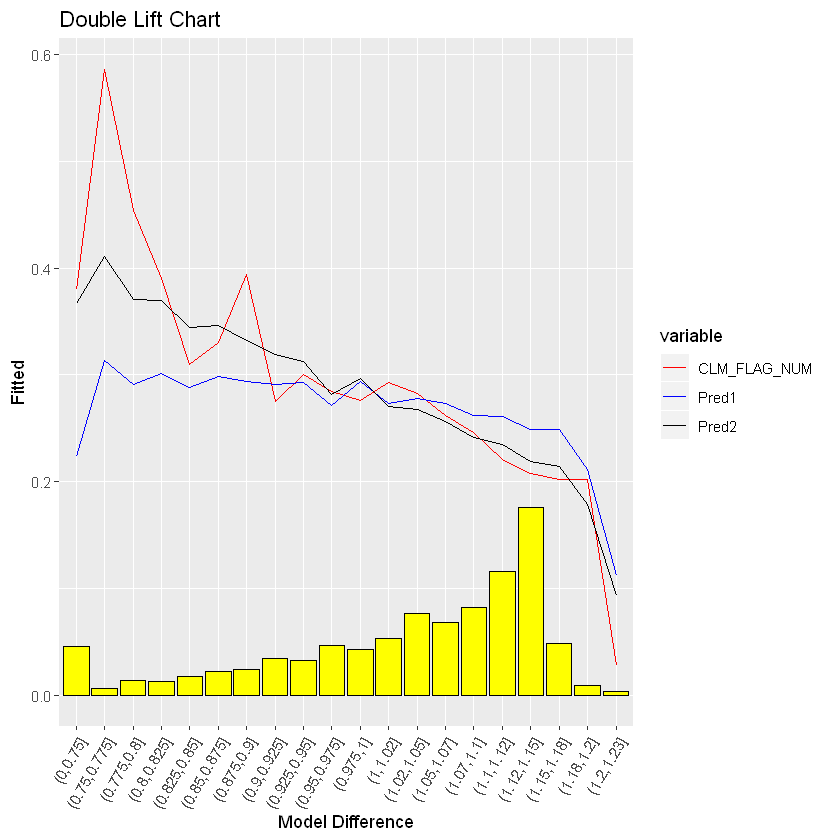

In [62]:
AutoClaim$Pred1 <- glm.freq$fitted.values
AutoClaim$Pred2 <- glm.freq3$fitted.values

PlotDoubleLiftChart(AutoClaim, 'Pred1', 'Pred2', 'CLM_FLAG_NUM', 'expo', banding = c(0,seq(0.75,1.25,0.025), 20)) 

$dframe
   ModelDifference SumWeight SumActual SumFitted1 SumFitted2 CLM_FLAG_NUM
29         (0,0.5]       136        47  24.966480  60.801276   0.34558824
18      (0.55,0.6]       153        51  31.551363  54.805083   0.33333333
27      (1.7,1.75]       219        22  45.569618  26.414122   0.10045662
23      (1.65,1.7]       197        18  41.418390  24.721721   0.09137056
21      (1.55,1.6]       174        20  36.974075  23.462204   0.11494253
7       (1.6,1.65]       159        22  34.181635  21.018626   0.13836478
31      (0.5,0.55]        75        35  16.428061  31.068260   0.46666667
25      (1.5,1.55]       189        37  45.155007  29.653109   0.19576720
26      (1.45,1.5]       270        38  65.346307  44.307646   0.14074074
10      (1.75,1.8]       153        24  37.958750  21.413321   0.15686275
19      (1.8,1.85]       111        16  27.662258  15.158726   0.14414414
6       (0.7,0.75]       500       196 126.781670 174.669721   0.39200000
15      (0.65,0.7]       330  

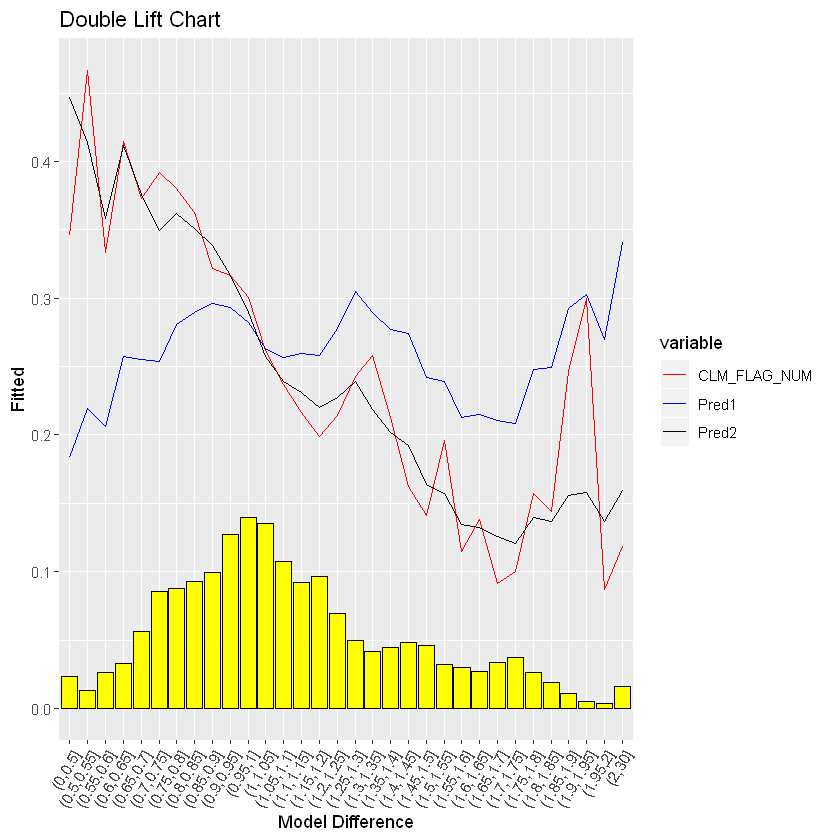

In [63]:
AutoClaim$Pred1 <- glm.freq$fitted.values

# Add CAR_USE and CAR_TYPE
glm.freq4 <- glm(formula = CLM_FLAG_NUM ~ AGE.ns + GENDER + MARRIED + JOBCLASS + MAX_EDUC 
                            + BLUEBOOK + CAR_USE + CAR_TYPE,
                 data = AutoClaim,
                 family = poisson(link='log'))

AutoClaim$Pred2 <- glm.freq4$fitted.values

PlotDoubleLiftChart(AutoClaim, 'Pred1', 'Pred2', 'CLM_FLAG_NUM', 'expo', banding = c(0,seq(0.5,2.0,0.05), 30)) 
